# CHANGE FOR CIC IDS AND ALSO BEFORE THIS WRITE DOWN ISSUES OF CIC IDS IN T1 AND WHICH MODELS YOU SKIPPED AND WHY

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.optim as optim


from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import SelectFromModel



from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer

from scipy.stats import entropy
from scipy.stats import wasserstein_distance
from scipy.stats import ks_2samp

In [2]:
# Load dataset
df = pd.read_csv('imp_final_df.csv')

# Display the first few rows of the dataset to understand its structure


print('originail shape:', df.shape)

df.head()


originail shape: (2827876, 21)


Average Packet Size   Packet Length Std   Packet Length Variance  \
0                   9.0                 0.0                      0.0   
1                   9.0                 0.0                      0.0   
2                   9.0                 0.0                      0.0   
3                   9.0                 0.0                      0.0   
4                   9.0                 0.0                      0.0   

    Packet Length Mean   Total Length of Bwd Packets   Subflow Bwd Bytes  \
0                  6.0                             0                   0   
1                  6.0                             6                   6   
2                  6.0                             6                   6   
3                  6.0                             6                   6   
4                  6.0                             0                   0   

    Destination Port   Avg Bwd Segment Size   Bwd Packet Length Mean  \
0              54865                    0.0                      0.0   
1              55054                    6.0                      6.0   
2              55055                    6.0                      6.0   
3              46236                    6.0                      6.0   
4              54863                    0.0                      0.0   

   Init_Win_bytes_forward  ...  Total Length of Fwd Packets  \
0                      33  ...                           12   
1                      29  ...                            6   
2                      29  ...                            6   
3                      31  ...                            6   
4                      32  ...                           12   

    Max Packet Length  Bwd Packet Length Max   Init_Win_bytes_backward  \
0                   6                      0                        -1   
1                   6                      6                       256   
2                   6                      6                       256   
3                   6                      6                       329   
4                   6                      0                        -1   

    Fwd Packet Length Max   Fwd Packet Length Mean   Avg Fwd Segment Size  \
0                       6                      6.0                    6.0   
1                       6                      6.0                    6.0   
2                       6                      6.0                    6.0   
3                       6                      6.0                    6.0   
4                       6                      6.0                    6.0   

    Flow IAT Max  Flow Bytes/s  target  
0              3  4.000000e+06       0  
1            109  1.100917e+05       0  
2             52  2.307692e+05       0  
3             34  3.529412e+05       0  
4              3  4.000000e+06       0  

[5 rows x 21 columns]

In [3]:
X = df.drop(columns=['target'])
y = df['target']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 1. CTGAN

In [4]:
# CTGAN
# Import necessary packages
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import scipy.stats as stats

# Define metadata for the dataset
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)

# CTGAN
ctgan = CTGANSynthesizer(metadata)
ctgan.fit(df)
data_ctgan = ctgan.sample(len(df))
#X_ctgan = synthetic_data.drop(columns='target').values
#y_ctgan = synthetic_data['target'].values

#X = data.drop(columns=['target'])
#y = data['target']

#df_ctgan = pd.DataFrame(X_ctgan, columns=X.columns)
#df_ctgan['target'] = y_ctgan

data_ctgan.head()

c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sdv\single_table\base.py:92: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Average Packet Size   Packet Length Std   Packet Length Variance  \
0              4.508640            1.643826             5.350107e+02   
1            154.032868          493.564458             3.951401e+04   
2            102.665117           40.249110             2.070739e+03   
3            101.940769           34.335705             1.801034e+03   
4           1055.389177         1657.451235             3.529480e+06   

    Packet Length Mean   Total Length of Bwd Packets   Subflow Bwd Bytes  \
0             3.459193                           165                 151   
1           128.768886                          1729                1836   
2            73.422952                           604                 615   
3            86.773270                           148                 316   
4           766.598896                         11093               13212   

    Destination Port   Avg Bwd Segment Size   Bwd Packet Length Mean  \
0                215               4.265928                 4.772876   
1                309             458.296393               532.083857   
2                 59             109.384345                91.761316   
3                137              98.705600               111.864261   
4                 70            1936.991572              1938.437206   

   Init_Win_bytes_forward  ...  Total Length of Fwd Packets  \
0                    1040  ...                            3   
1                   65451  ...                          546   
2                      -1  ...                           91   
3                      -1  ...                          272   
4                      43  ...                          404   

    Max Packet Length  Bwd Packet Length Max   Init_Win_bytes_backward  \
0                   5                      5                        -1   
1                1434                   1442                       988   
2                 110                    120                        -1   
3                 118                    125                        -1   
4                5784                   5821                       199   

    Fwd Packet Length Max   Fwd Packet Length Mean   Avg Fwd Segment Size  \
0                       1                 1.459754               2.286418   
1                     418                55.921976              55.171207   
2                      58                70.902382              69.596152   
3                      57                36.600357              48.783718   
4                     344               106.163591              85.959521   

    Flow IAT Max   Flow Bytes/s  target  
0            -13 -116412.595663       1  
1       58910456   10638.428569       0  
2           1281  833225.335455       0  
3       17116715    4921.669230       0  
4       98301426   -8658.426282       1  

[5 rows x 21 columns]

In [5]:
data_ctgan.to_csv('data_ctgan_T2.csv', index = False)

# 2. GANBLR++

In [6]:
#pip install ganblr

In [7]:
#from ganblr import get_demo_data
from ganblr.models import GANBLRPP

# to have the same datatype
def is_numerical(dtype):
    return dtype.kind in 'iuf'

# Check for numerical columns in the features only (exclude target column)
column_is_numerical = df.iloc[:, :-1].dtypes.apply(is_numerical).values
numerical_columns = np.argwhere(column_is_numerical).ravel()

# # Ensure numerical_columns are within the bounds of data's feature columns
# if numerical_columns.max() >= df.shape[1] - 1:
#     raise IndexError("Numerical column index out of bounds")

#Initialize the model with the correct numerical columns
model = GANBLRPP(numerical_columns)


# Fit the model
model.fit(df.values[:, :-1], df.values[:, -1], epochs=10)


# Generate synthetic data
synthetic_data = model.sample(1000)
data_ganblrpp = pd.DataFrame(synthetic_data, columns=df.columns)

# Map the data types from the real data to the synthetic data
dtype_mapping = df.dtypes.to_dict()
data_ganblrpp = data_ganblrpp.astype(dtype_mapping)

data_ganblrpp.head()


c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. 

warmup run:




c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88372/88372 ━━━━━━━━━━━━━━━━━━━━ 53s 581us/step - accuracy: 0.9775 - loss: 0.0618


c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)
c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Epoch 1/10: G_loss = 5.376029, G_accuracy = 0.982716, D_loss = 0.121230, D_accuracy = 0.957579


c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Epoch 2/10: G_loss = 5.584273, G_accuracy = 0.982840, D_loss = 0.107332, D_accuracy = 0.964626


c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Epoch 3/10: G_loss = 6.821594, G_accuracy = 0.982904, D_loss = 0.094571, D_accuracy = 0.967926


c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Epoch 4/10: G_loss = 6.033538, G_accuracy = 0.982952, D_loss = 0.094248, D_accuracy = 0.969568


c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Epoch 5/10: G_loss = 7.081058, G_accuracy = 0.983011, D_loss = 0.098632, D_accuracy = 0.969603


c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Epoch 6/10: G_loss = 6.611621, G_accuracy = 0.983034, D_loss = 0.085523, D_accuracy = 0.971911


c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Epoch 7/10: G_loss = 6.333740, G_accuracy = 0.983042, D_loss = 0.086675, D_accuracy = 0.971692


c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\ganblr\models\ganblr.py:76: RuntimeWarning: divide by zero encountered in log
  ls = np.mean(-np.log(np.subtract(1, prob_fake)))
c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Epoch 8/10: G_loss = inf, G_accuracy = 0.983080, D_loss = 0.092384, D_accuracy = 0.971771


c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\ganblr\models\ganblr.py:76: RuntimeWarning: divide by zero encountered in log
  ls = np.mean(-np.log(np.subtract(1, prob_fake)))
c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Epoch 9/10: G_loss = inf, G_accuracy = 0.983106, D_loss = 0.086101, D_accuracy = 0.972696


c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\ganblr\models\ganblr.py:76: RuntimeWarning: divide by zero encountered in log
  ls = np.mean(-np.log(np.subtract(1, prob_fake)))
c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


Epoch 10/10: G_loss = inf, G_accuracy = 0.983106, D_loss = 0.101267, D_accuracy = 0.971871
Step 1/2: Sampling discrete data from GANBLR.


Generating for node: 9: 100%|██████████| 21/21 [00:00<00:00, 1255.92it/s]
c:\Users\USTB\AppData\Local\Programs\Python\Python312\Lib\site-packages\pgmpy\sampling\base.py:598: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pd.DataFrame.from_records(samples)


step 2/2: Sampling numerical data.


sampling: 100%|██████████| 20/20 [00:00<00:00, 281.91it/s]


Average Packet Size   Packet Length Std   Packet Length Variance  \
0             22.136751           18.073831            209548.612867   
1             21.194658          138.891760             91855.519620   
2             22.146705           19.735763            233626.093888   
3             22.590629           21.158593            213844.112522   
4             13.959512          981.980880            222293.909073   

    Packet Length Mean   Total Length of Bwd Packets   Subflow Bwd Bytes  \
0           896.100846                          7129                9230   
1           989.805744                          5962                5867   
2           905.945322                           257                6590   
3           928.293833                         94216               21073   
4           893.467961                          -454              109406   

    Destination Port   Avg Bwd Segment Size   Bwd Packet Length Mean  \
0              25657             599.550517               386.761965   
1              46570             543.911845               108.990830   
2              49318             638.815985               224.902795   
3              45748             664.662624               133.170098   
4              45841             551.055231               104.815443   

   Init_Win_bytes_forward  ...  Total Length of Fwd Packets  \
0                    1007  ...                        13752   
1                    1081  ...                        12037   
2                   65367  ...                        12653   
3                   65266  ...                        14482   
4                   65655  ...                        15810   

    Max Packet Length  Bwd Packet Length Max   Init_Win_bytes_backward  \
0                 132                    580                     65729   
1                 271                    199                      1003   
2                 145                    191                        10   
3                  89                    169                        15   
4                 310                    183                       310   

    Fwd Packet Length Max   Fwd Packet Length Mean   Avg Fwd Segment Size  \
0                     431                10.235894              29.354336   
1                      73                18.477854              24.655511   
2                     214                17.456690              29.591831   
3                     208                20.234137              29.508571   
4                      75                37.606298              26.844559   

    Flow IAT Max  Flow Bytes/s  target  
0        7353434 -4.511862e+06       0  
1        4801225  5.033203e+07       0  
2       10002535  8.341472e+08       0  
3          17431  1.284250e+07       0  
4        4897946  4.199080e+06       0  

[5 rows x 21 columns]

In [8]:
data_ganblrpp.to_csv('data_ganblrpp.csv', index = False)

# 3. Copula GAN

In [9]:
# Define metadata for the dataset
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)

# CopulaGan
from sdv.single_table import CopulaGANSynthesizer

copulagan = CopulaGANSynthesizer(metadata)
copulagan.fit(df)

data_copula_gan = copulagan.sample(len(df))
data_copula_gan.head()

INFO:sdv.metadata.single_table:Detected metadata:
INFO:sdv.metadata.single_table:{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        " Average Packet Size": {
            "sdtype": "numerical"
        },
        " Packet Length Std": {
            "sdtype": "numerical"
        },
        " Packet Length Variance": {
            "sdtype": "numerical"
        },
        " Packet Length Mean": {
            "sdtype": "numerical"
        },
        " Total Length of Bwd Packets": {
            "sdtype": "numerical"
        },
        " Subflow Bwd Bytes": {
            "sdtype": "numerical"
        },
        " Destination Port": {
            "sdtype": "numerical"
        },
        " Avg Bwd Segment Size": {
            "sdtype": "numerical"
        },
        " Bwd Packet Length Mean": {
            "sdtype": "numerical"
        },
        "Init_Win_bytes_forward": {
            "sdtype": "numerical"
        },
        " Subflow Fwd Bytes": {
            "sdtype":

Average Packet Size   Packet Length Std   Packet Length Variance  \
0          2.683044e+00            3.416839             1.224179e+01   
1          3.084452e+02          484.692547             6.754899e+05   
2          1.121053e+02          388.879958             1.815323e+05   
3          5.808610e-23            0.000971             4.747183e-03   
4          1.516891e+03         2785.344913             9.713269e+06   

    Packet Length Mean   Total Length of Bwd Packets   Subflow Bwd Bytes  \
0             2.000550                             6                   6   
1           234.137353                          3397                5073   
2           207.151032                          4333                4583   
3             0.009196                             0                   0   
4          1417.692247                         11705               11708   

    Destination Port   Avg Bwd Segment Size   Bwd Packet Length Mean  \
0               2724               5.972802                 5.934781   
1                443             684.020973               678.021561   
2                443             362.564313               923.595122   
3              53437               0.000000                 0.000000   
4                 88            2376.345635              2448.773307   

   Init_Win_bytes_forward  ...  Total Length of Fwd Packets  \
0                   29154  ...                            0   
1                    8319  ...                          344   
2                   30240  ...                         1116   
3                     111  ...                            0   
4                     285  ...                          324   

    Max Packet Length  Bwd Packet Length Max   Init_Win_bytes_backward  \
0                   6                      6                         0   
1                1453                   1452                       236   
2                1449                   1456                       178   
3                   0                      0                       383   
4                8268                   7725                       230   

    Fwd Packet Length Max   Fwd Packet Length Mean   Avg Fwd Segment Size  \
0                       0             6.272003e-10           6.288784e-10   
1                     198             6.164178e+01           5.915163e+01   
2                     196             4.882362e+01           4.839876e+01   
3                       0             6.235778e-10           6.165781e-10   
4                     356             5.359001e+01           5.424590e+01   

    Flow IAT Max   Flow Bytes/s  target  
0             28  168766.360322       1  
1         953123    -968.798915       0  
2       10089346   -5539.904505       0  
3            172   -2603.260059       0  
4       80539788    8779.491524       1  

[5 rows x 21 columns]

In [10]:
data_copula_gan.to_csv('data_copula_gan.csv', index = False)

In [11]:
# 4. CASTGAN

In [12]:
data_castgan = pd.read_csv("data_castgan.csv")
data_castgan.head()

Average Packet Size   Packet Length Std   Packet Length Variance  \
0             38.115658            2.607349            -3.610255e+02   
1             93.933917           38.094307             8.015107e+02   
2            956.519714         1770.447889             3.725787e+06   
3            172.410231           68.884006             5.663359e+02   
4            204.496926          387.361066             8.445416e+04   

    Packet Length Mean   Total Length of Bwd Packets   Subflow Bwd Bytes  \
0            16.041207                           109                 356   
1            68.510482                           246                 146   
2           266.445928                         12849               13530   
3           107.619974                           264                 323   
4           171.843851                           442                2785   

    Destination Port   Avg Bwd Segment Size   Bwd Packet Length Mean  \
0                607               1.737650                 0.065384   
1                 64             110.908674               110.228143   
2                 55             373.455743              1027.974466   
3                 61             183.587533               225.413937   
4                315             203.306731               189.582542   

   Init_Win_bytes_forward  ...  Total Length of Fwd Packets  \
0                    8292  ...                           68   
1                     -23  ...                           66   
2                     293  ...                          325   
3                     -11  ...                          151   
4                   29192  ...                         2080   

    Max Packet Length  Bwd Packet Length Max   Init_Win_bytes_backward  \
0                  47                      0                         0   
1                 102                    104                         0   
2                5498                   4991                       233   
3                 194                    188                         0   
4                2164                    875                       328   

    Fwd Packet Length Max   Fwd Packet Length Mean   Avg Fwd Segment Size  \
0                      46                18.156864              26.513248   
1                      46                42.288812              44.380350   
2                     347                42.563971              47.171809   
3                      86                98.438768              95.094196   
4                     802               103.074065              99.700263   

    Flow IAT Max  Flow Bytes/s  target  
0           2069  3.049718e+06       0  
1          49945  5.704117e+03       0  
2       10441140 -5.630120e+01       1  
3          -9774  2.951534e+06       0  
4         558116  6.450475e+03       0  

[5 rows x 21 columns]

## Correlation Comparison

In [13]:
# Calculate correlation matrices
real_corr = df.corr()
ctgan_corr = data_ctgan.corr()
abs_diff_ctgan_corr= (real_corr - ctgan_corr).abs()

garnblr_corr = data_ganblrpp.corr()
abs_diff_garnblr_corr = (real_corr - garnblr_corr).abs()

copula_corr = data_copula_gan.corr()
abs_diff_copula_corr = (real_corr - copula_corr).abs()

castgan_corr = data_castgan.corr()
abs_diff_castgan_corr = (real_corr - castgan_corr).abs()



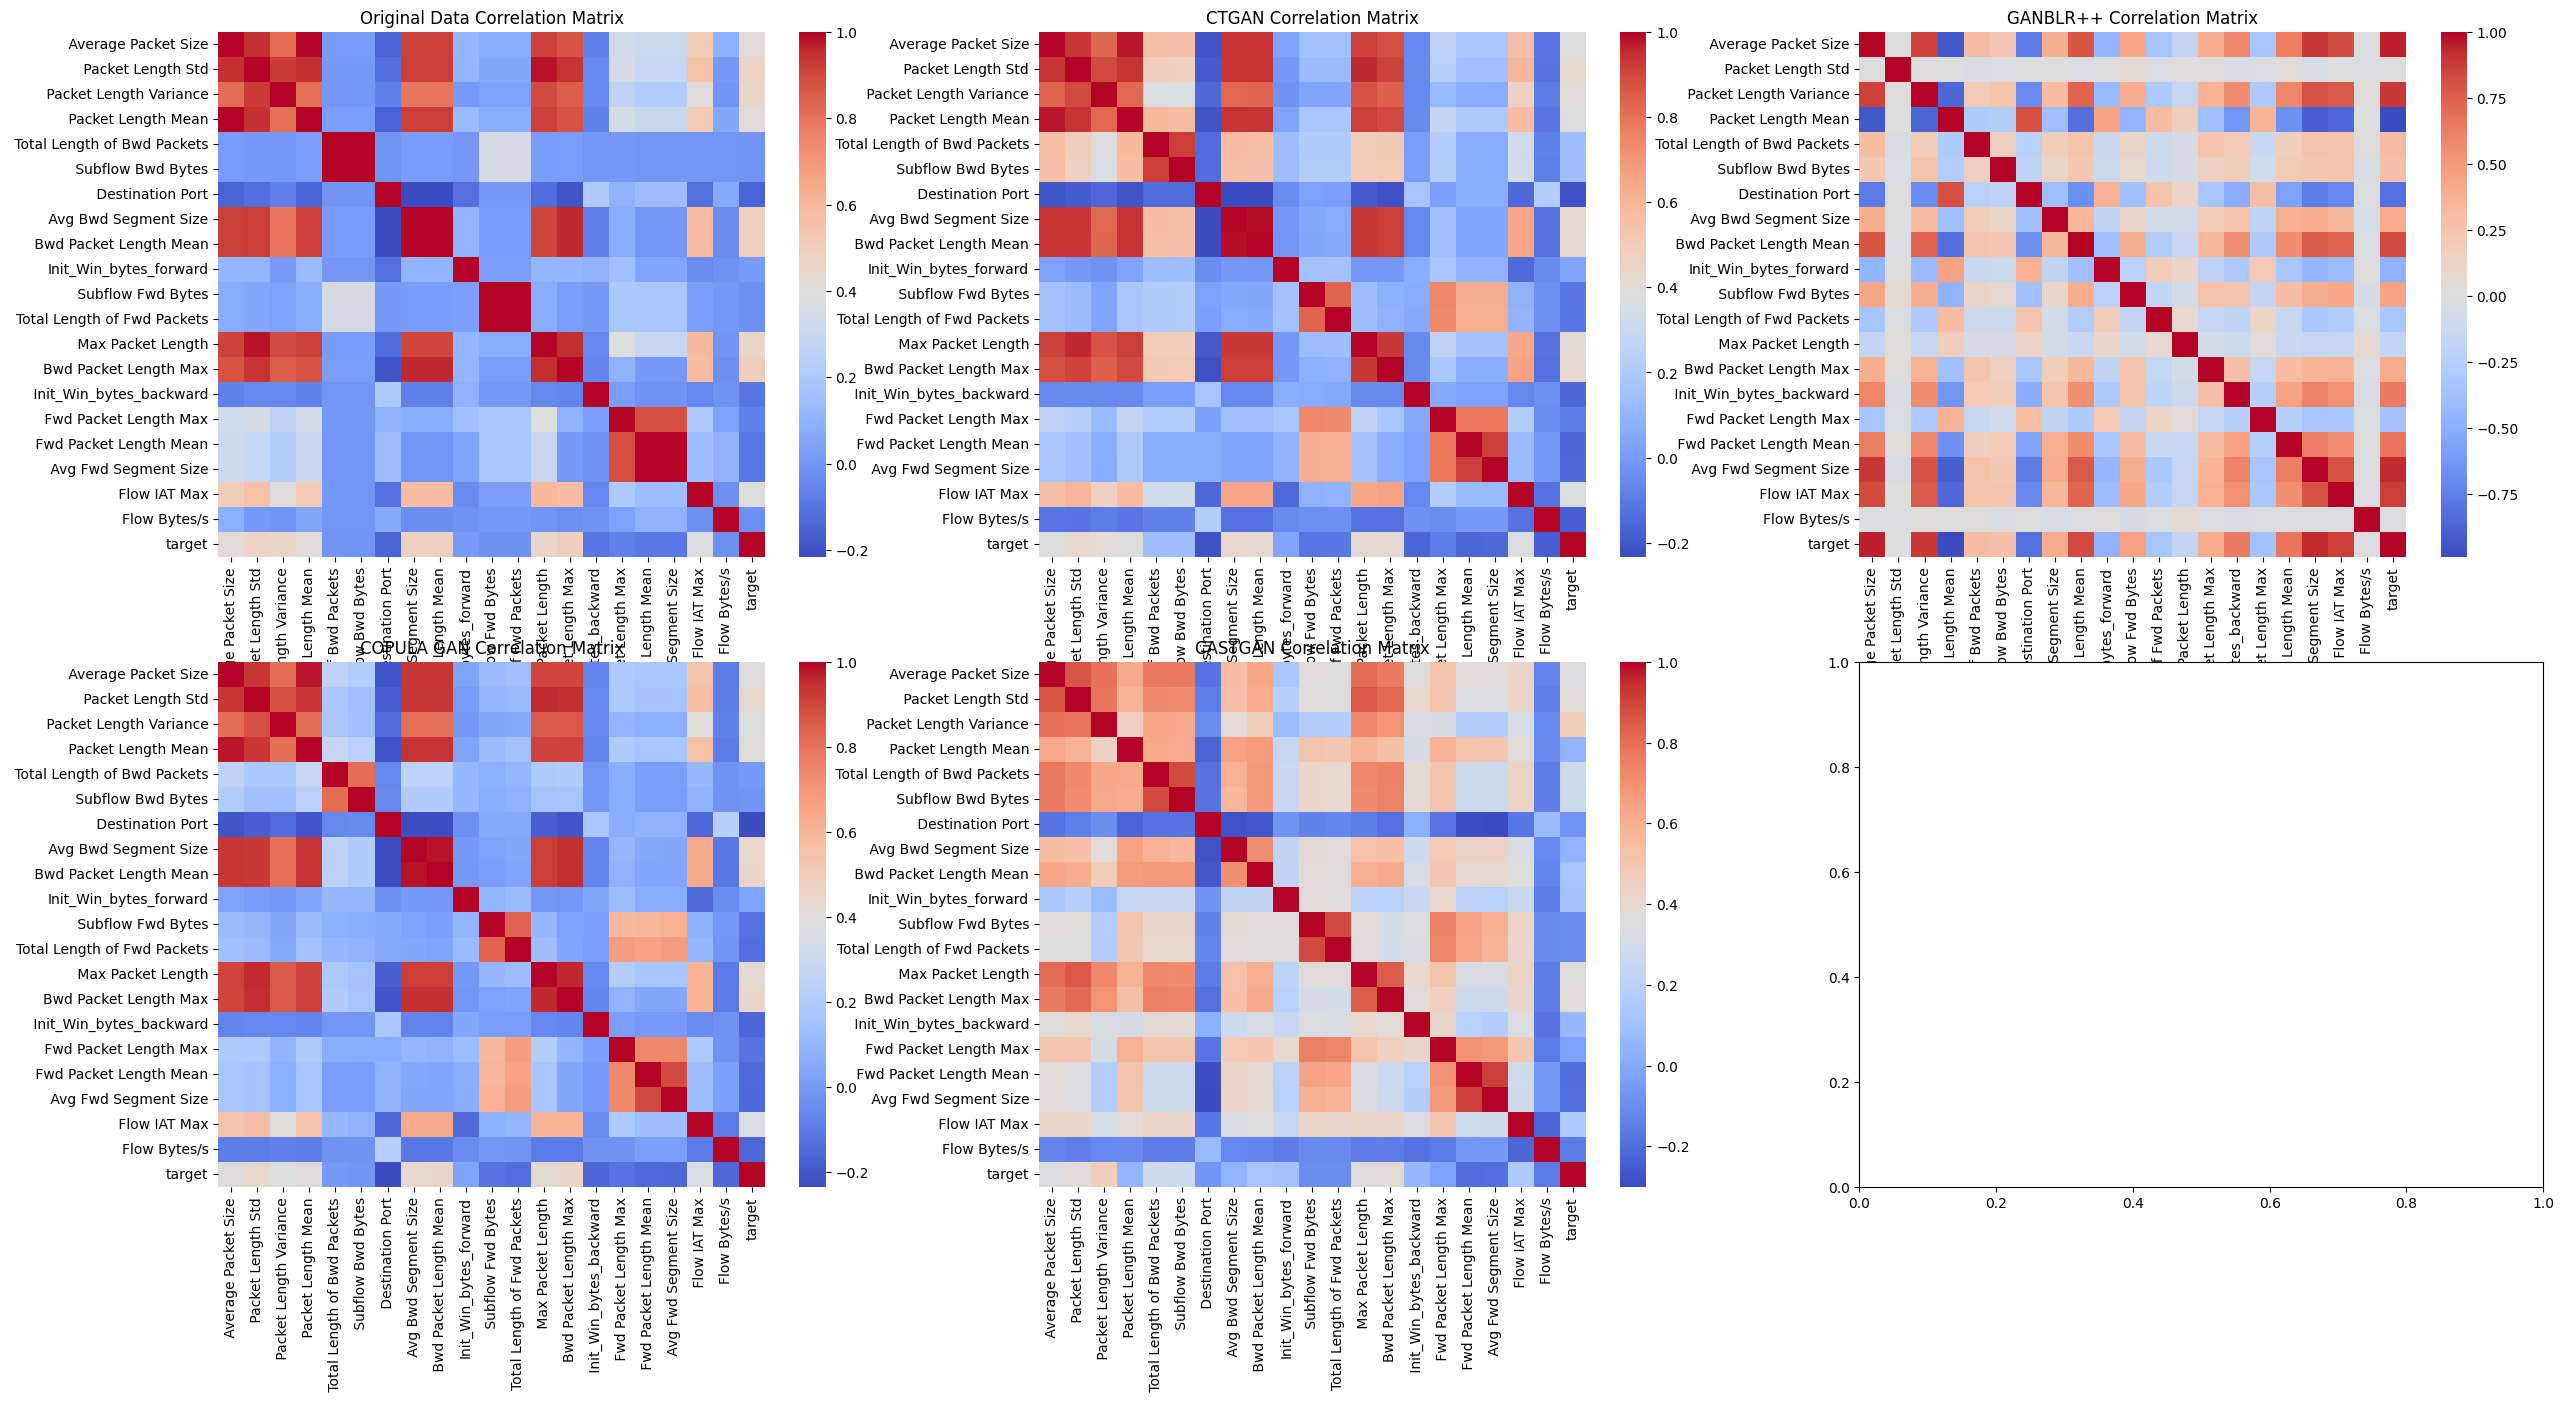

In [14]:
#sns.heatmap(corr, cmap="coolwarm", annot=False, xticklabels=corr.columns, yticklabels=corr.columns)
# Plot the correlation matrix of the original and all oversampled data
fig, axes = plt.subplots(2, 3, figsize=(30, 15))
sns.heatmap(df.corr(), ax=axes[0, 0], cmap="coolwarm", annot=False, xticklabels=df.corr().columns, yticklabels=df.corr().columns)
axes[0, 0].set_title("Original Data Correlation Matrix")
sns.heatmap(data_ctgan.corr(), ax=axes[0, 1], cmap="coolwarm", annot=False, xticklabels=data_ctgan.corr().columns, yticklabels=data_ctgan.corr().columns)
axes[0, 1].set_title("CTGAN Correlation Matrix")
sns.heatmap(data_ganblrpp.corr(), ax=axes[0, 2], cmap="coolwarm", annot=False, xticklabels=data_ganblrpp.corr().columns, yticklabels=data_ganblrpp.corr().columns)
axes[0, 2].set_title("GANBLR++ Correlation Matrix")
sns.heatmap(data_copula_gan.corr(), ax=axes[1, 0], cmap="coolwarm", annot=False, xticklabels=data_copula_gan.corr().columns, yticklabels=data_copula_gan.corr().columns)
axes[1, 0].set_title("COPULA GAN Correlation Matrix")
sns.heatmap(data_castgan.corr(), ax=axes[1, 1], cmap="coolwarm", annot=False, xticklabels=data_castgan.corr().columns, yticklabels=data_castgan.corr().columns)
axes[1, 1].set_title("CASTGAN Correlation Matrix")
plt.show()

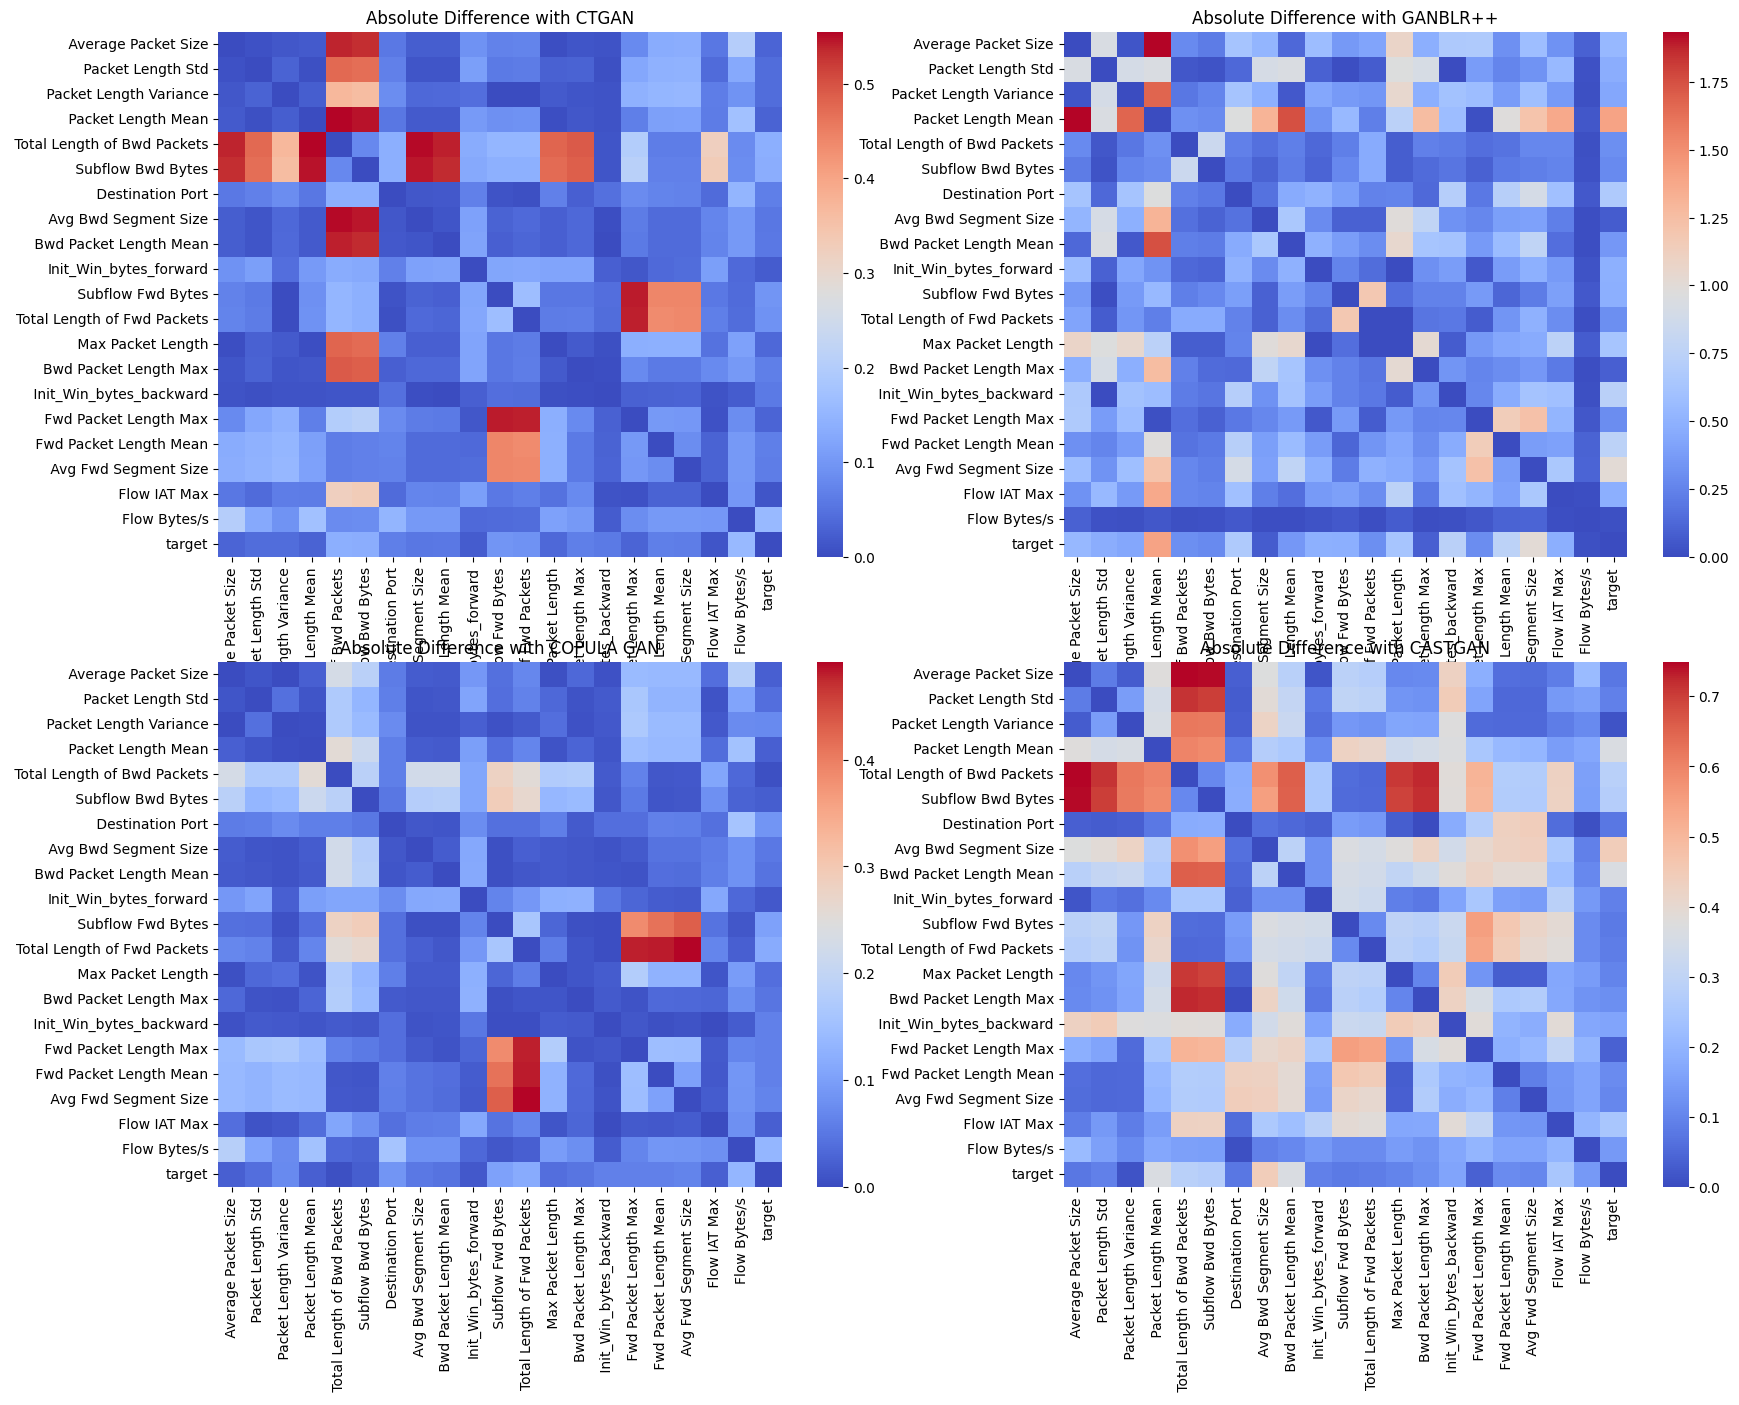

In [15]:

# Plot the absolute difference heatmaps
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
sns.heatmap(abs_diff_ctgan_corr, ax=axes[0, 0], cmap="coolwarm", annot=False, xticklabels=abs_diff_ctgan_corr.columns, yticklabels=abs_diff_ctgan_corr.columns)
axes[0, 0].set_title("Absolute Difference with CTGAN")
sns.heatmap(abs_diff_garnblr_corr, ax=axes[0, 1], cmap="coolwarm", annot=False, xticklabels=abs_diff_garnblr_corr.columns, yticklabels=abs_diff_garnblr_corr.columns)
axes[0, 1].set_title("Absolute Difference with GANBLR++")
sns.heatmap(abs_diff_copula_corr, ax=axes[1, 0], cmap="coolwarm", annot=False, xticklabels=abs_diff_copula_corr.columns, yticklabels=abs_diff_copula_corr.columns)
axes[1, 0].set_title("Absolute Difference with COPULA GAN")
sns.heatmap(abs_diff_castgan_corr, ax=axes[1, 1], cmap="coolwarm", annot=False, xticklabels=abs_diff_castgan_corr.columns, yticklabels=abs_diff_castgan_corr.columns)
axes[1, 1].set_title("Absolute Difference with CASTGAN")

plt.show()


## Probability Distribution


In [16]:
# Define a function to count columns in each DataFrame
def count_columns(dataframes, titles):
    column_counts = {}
    for df, title in zip(dataframes, titles):
        column_counts[title] = len(df.columns)
    return column_counts


# List of DataFrames
dfs = [df, data_ctgan, data_ganblrpp, data_copula_gan, data_castgan]
titles = ["Original Data", "CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]

# Count the columns in each DataFrame
column_counts = count_columns(dfs, titles)

# Print the column counts
for title, count in column_counts.items():
    print(f"{title} has {count} columns.")


Original Data has 21 columns.
CTGAN has 21 columns.
GANBLR++ has 21 columns.
COPULA GAN has 21 columns.
CASTGAN has 21 columns.



--- Average Results ---
Original Data:
Equal Distributions: 20
Different Distributions: 0
Average KS P-value: 1.0
-----------------------------
CTGAN:
Equal Distributions: 0
Different Distributions: 20
Average KS P-value: 0.0
-----------------------------
GANBLR++:
Equal Distributions: 0
Different Distributions: 20
Average KS P-value: 4.0563186070385707e-56
-----------------------------
COPULA GAN:
Equal Distributions: 0
Different Distributions: 20
Average KS P-value: 0.0
-----------------------------
CASTGAN:
Equal Distributions: 0
Different Distributions: 20
Average KS P-value: 0.0
-----------------------------


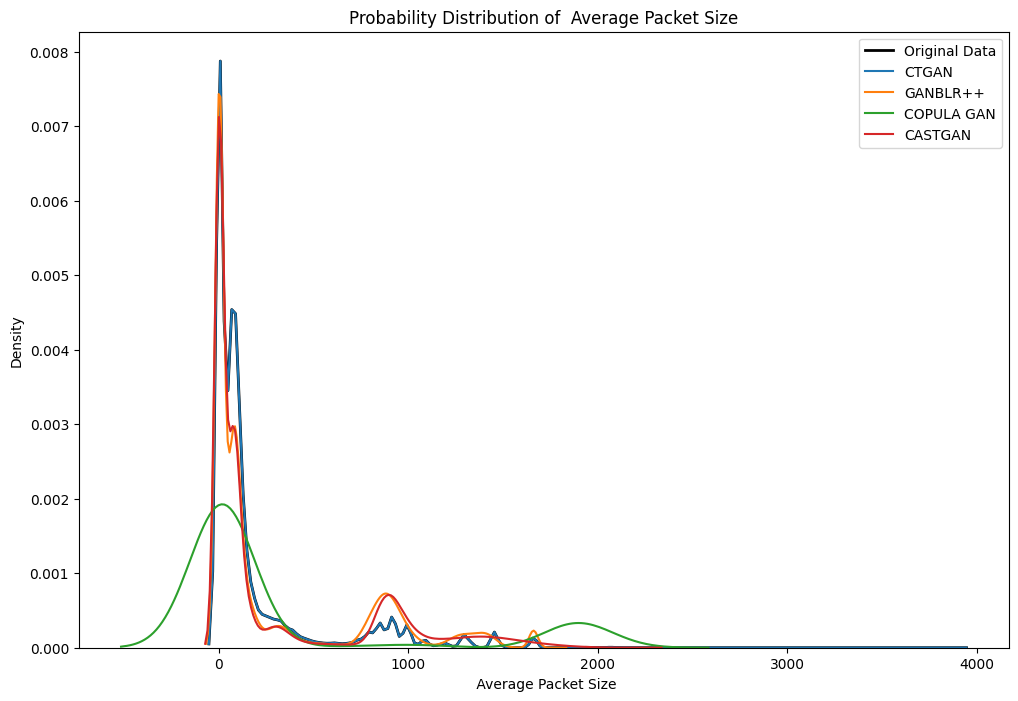

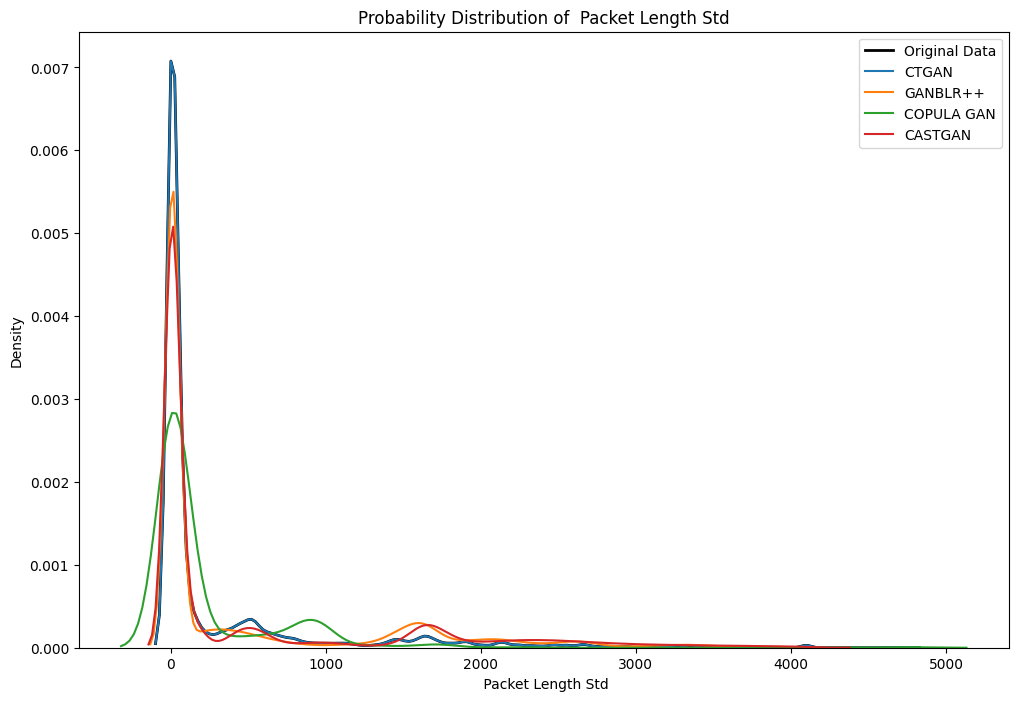

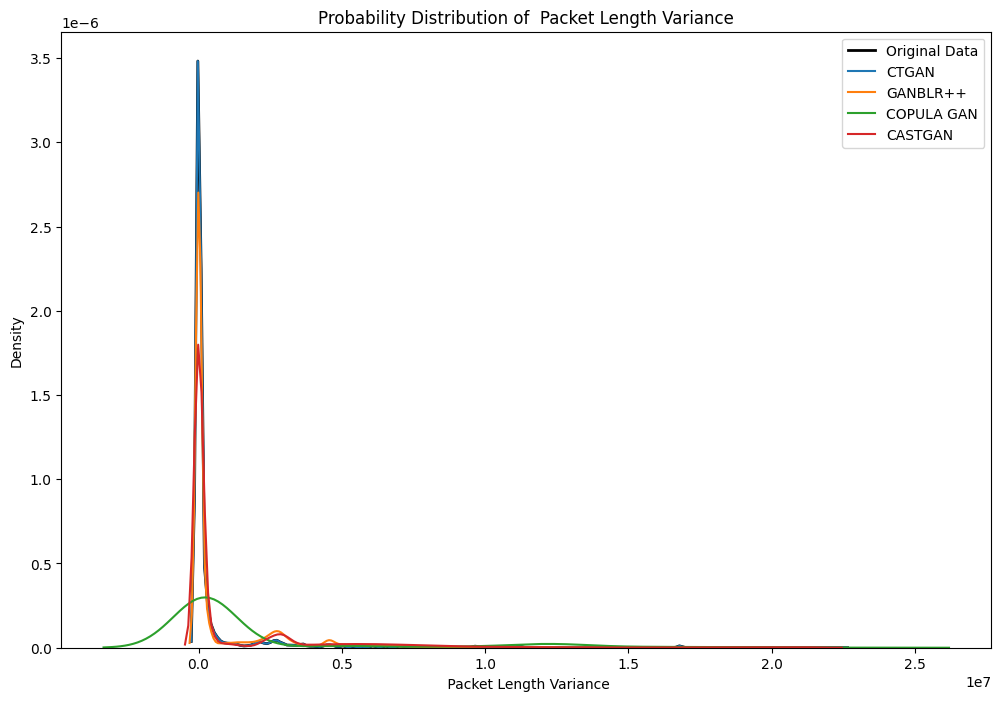

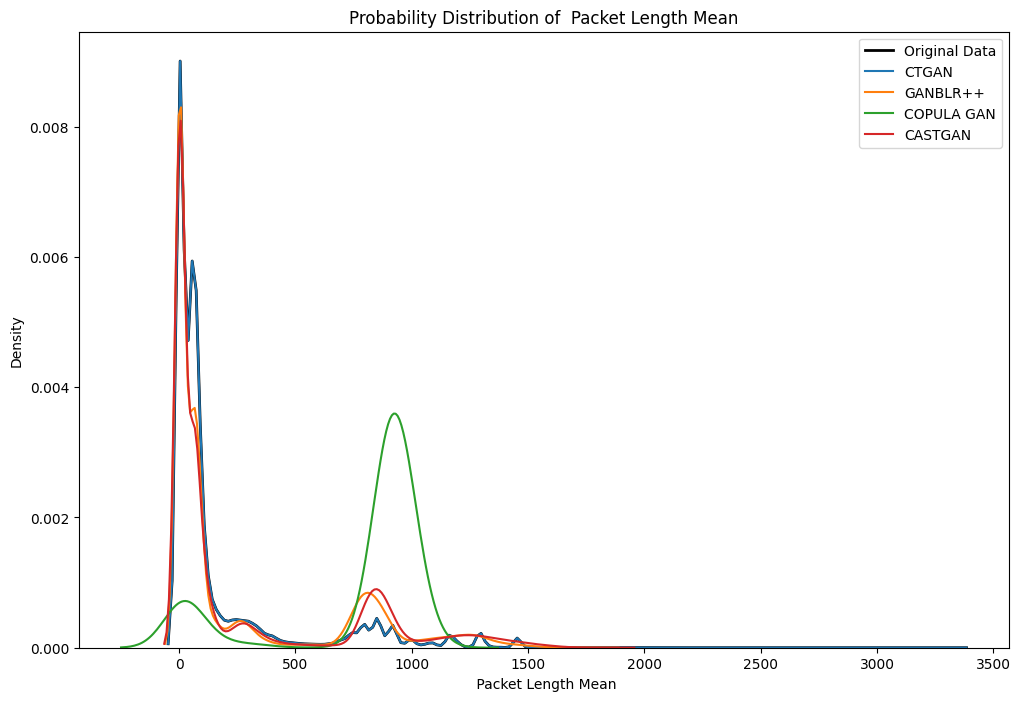

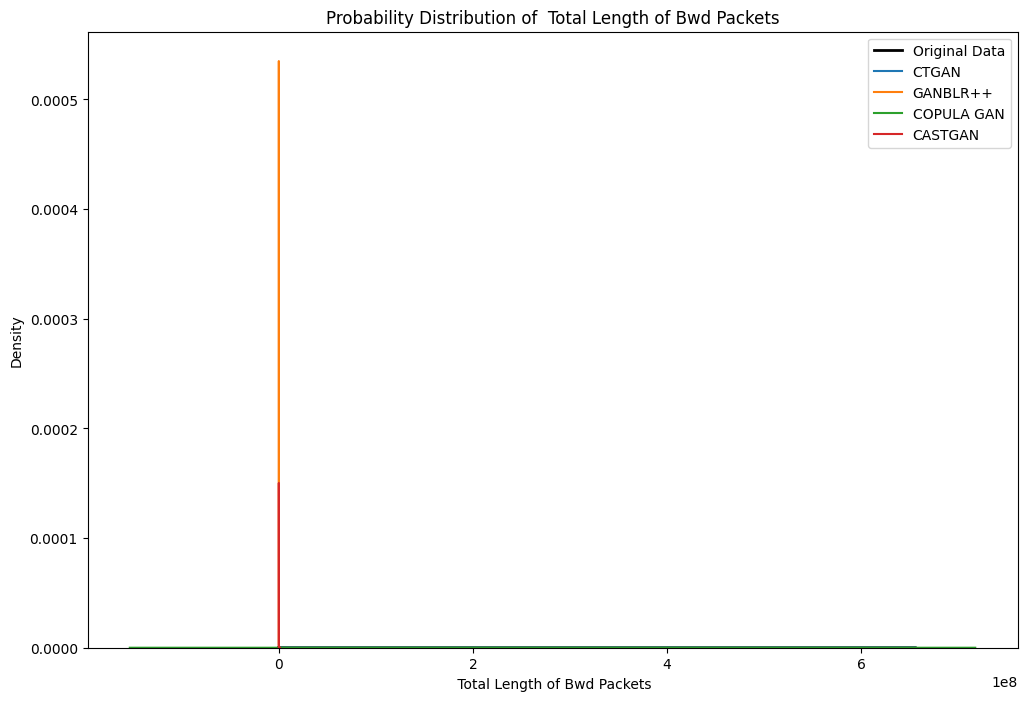

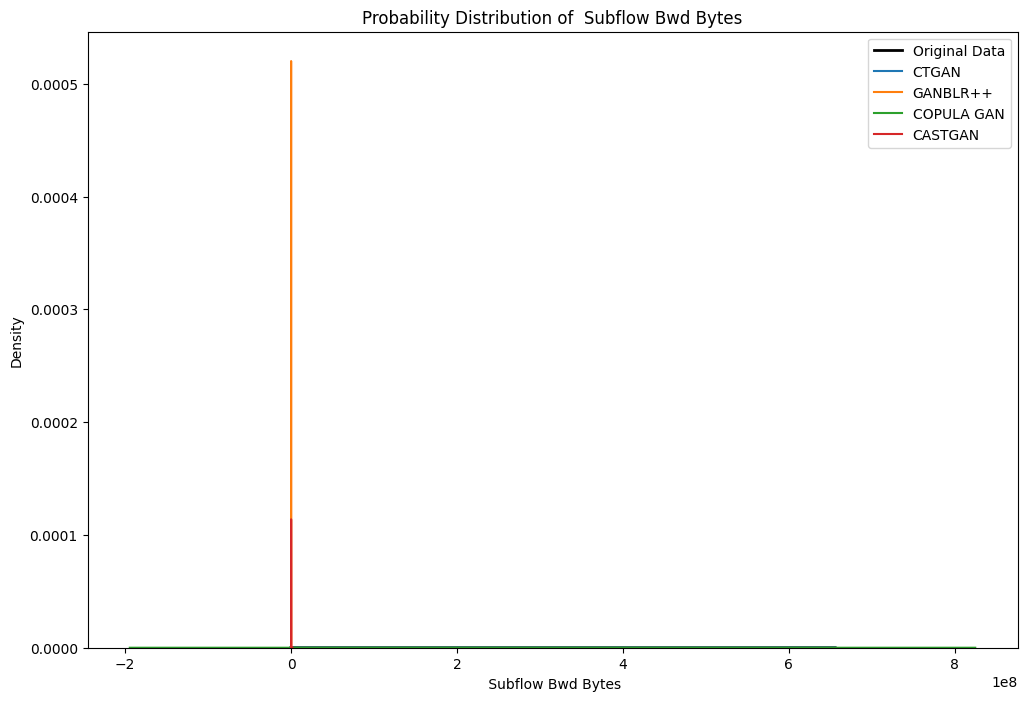

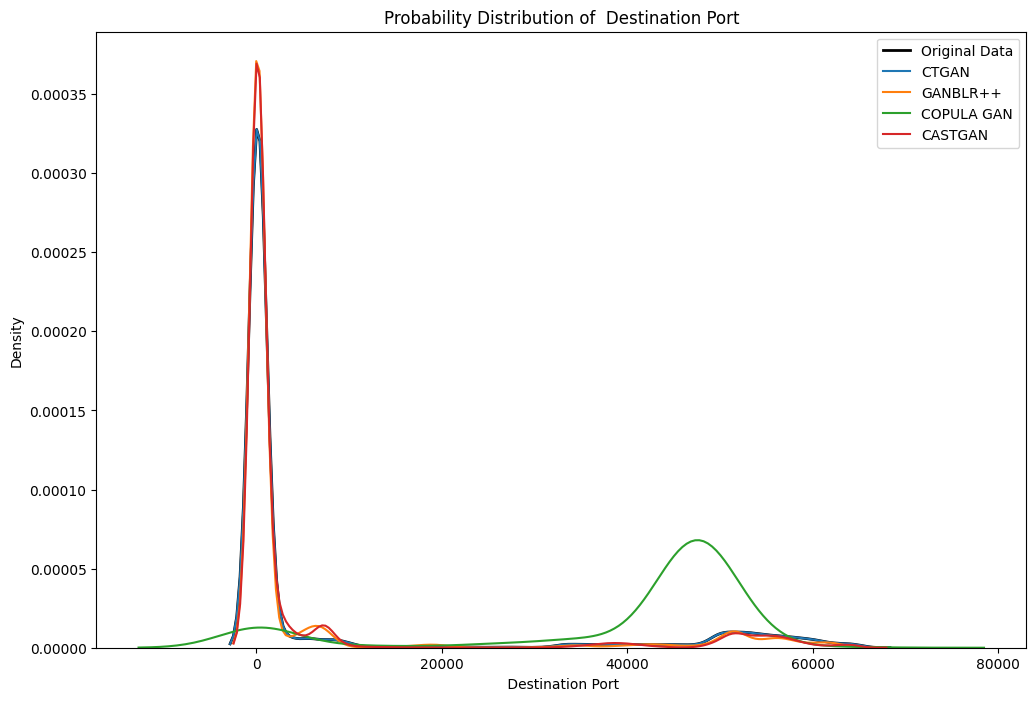

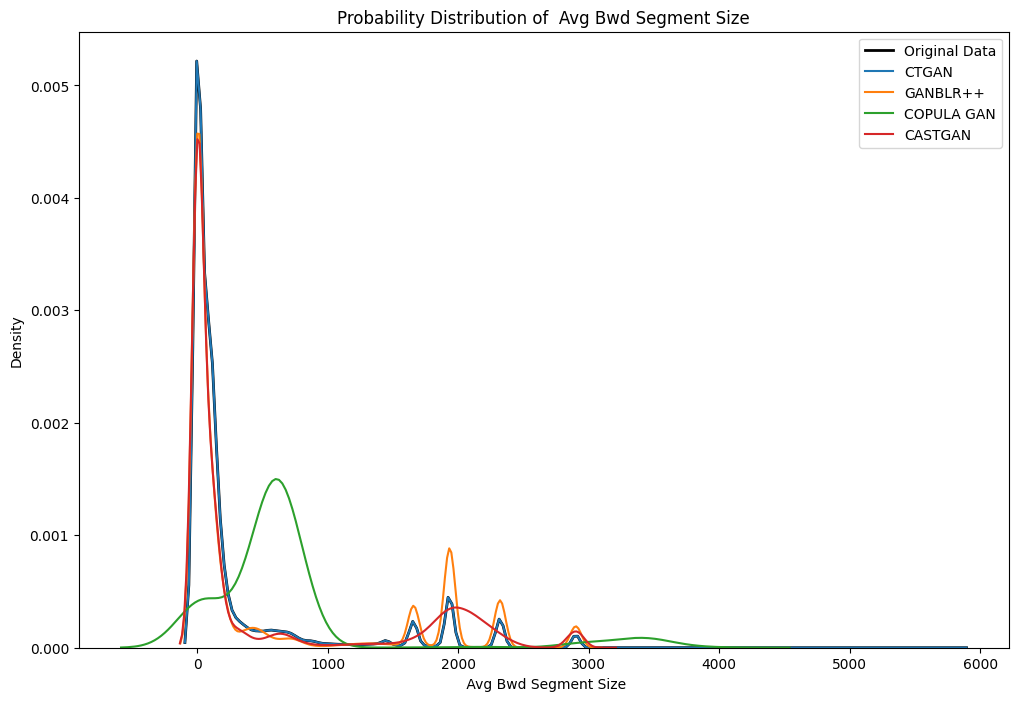

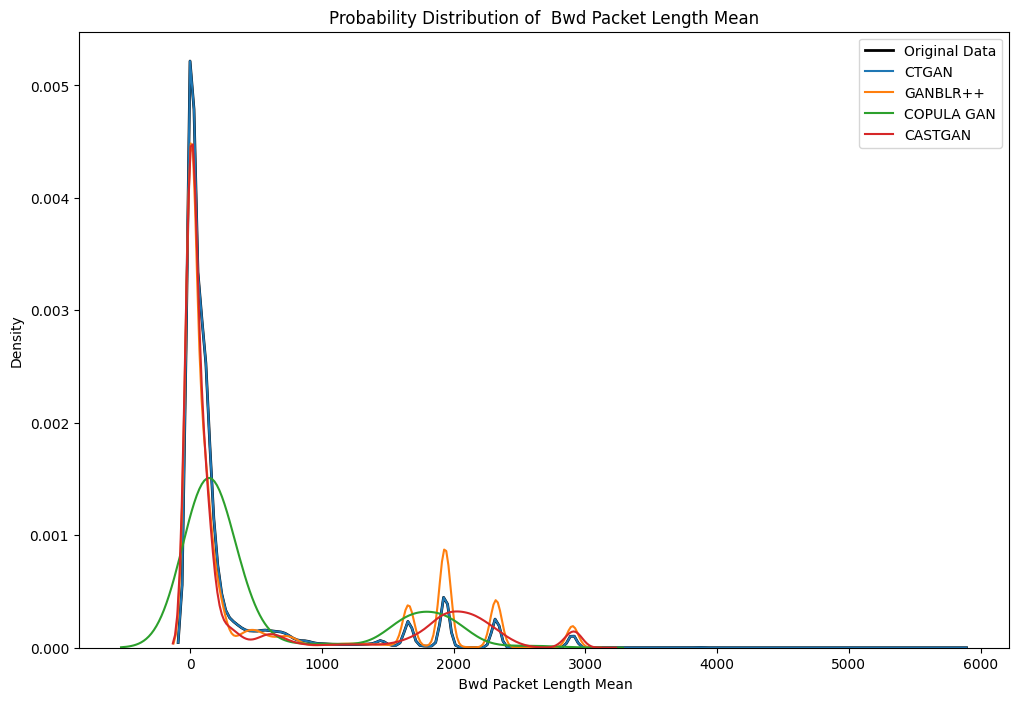

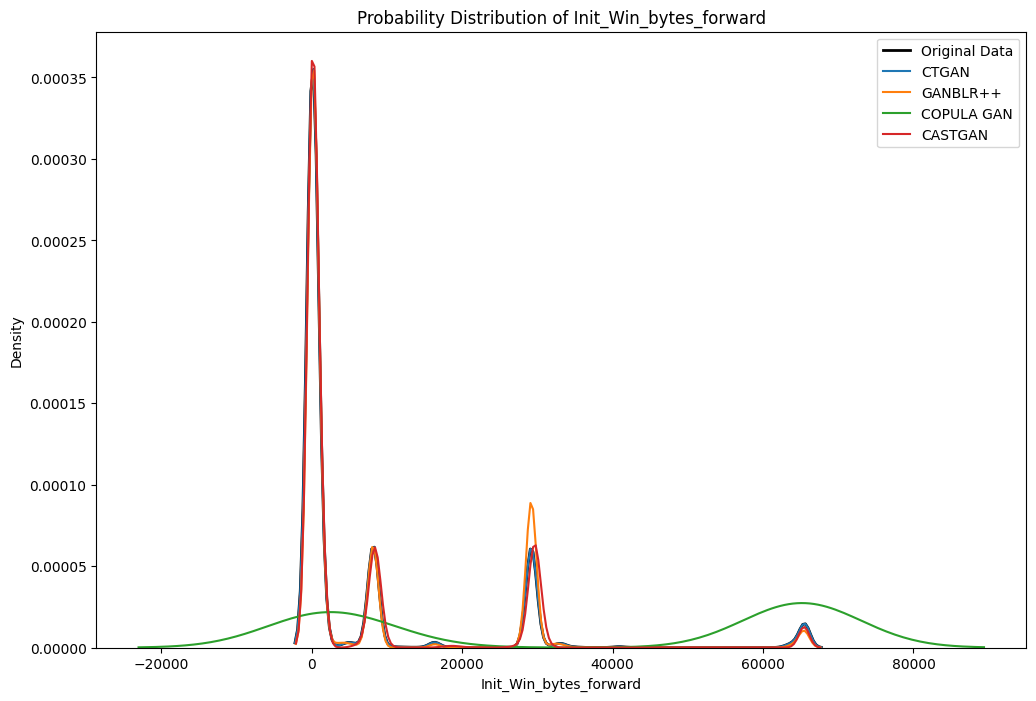

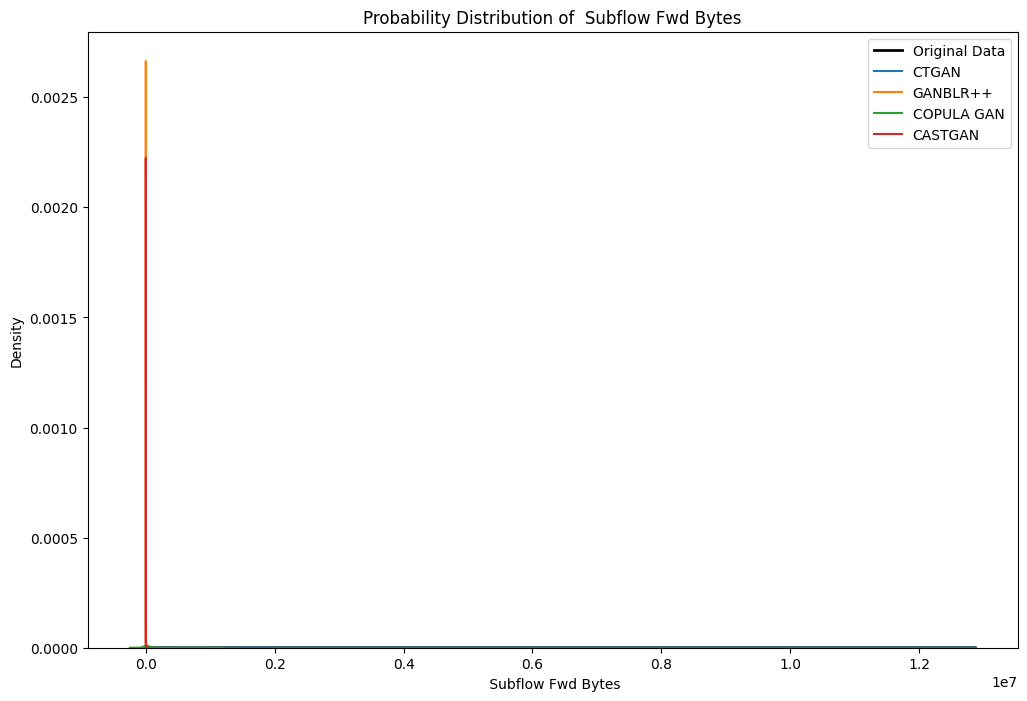

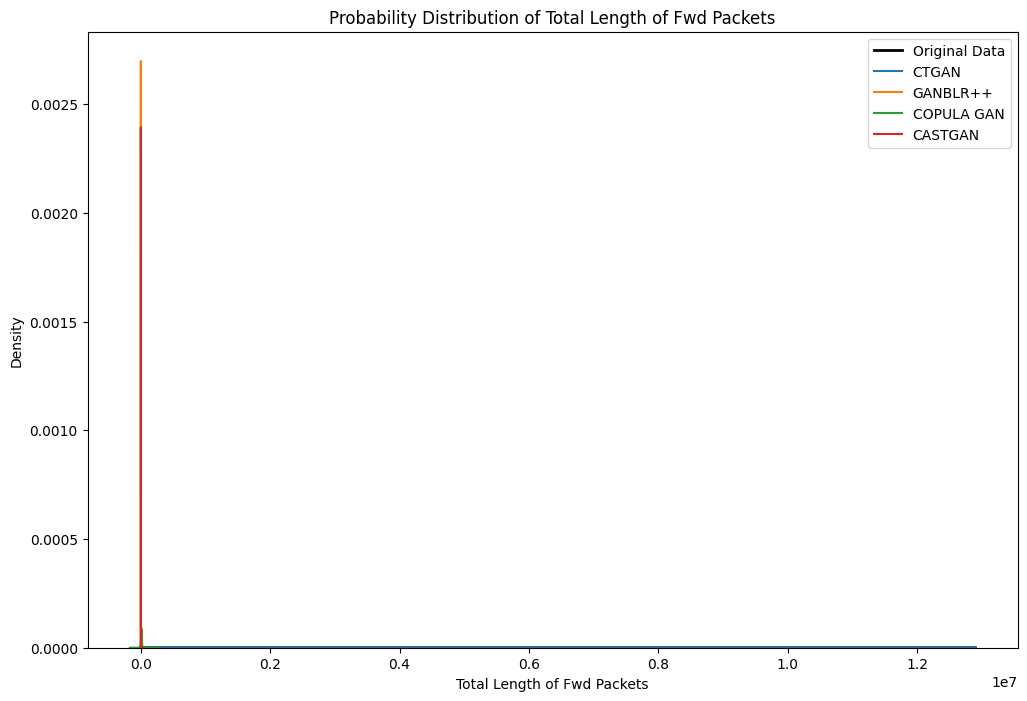

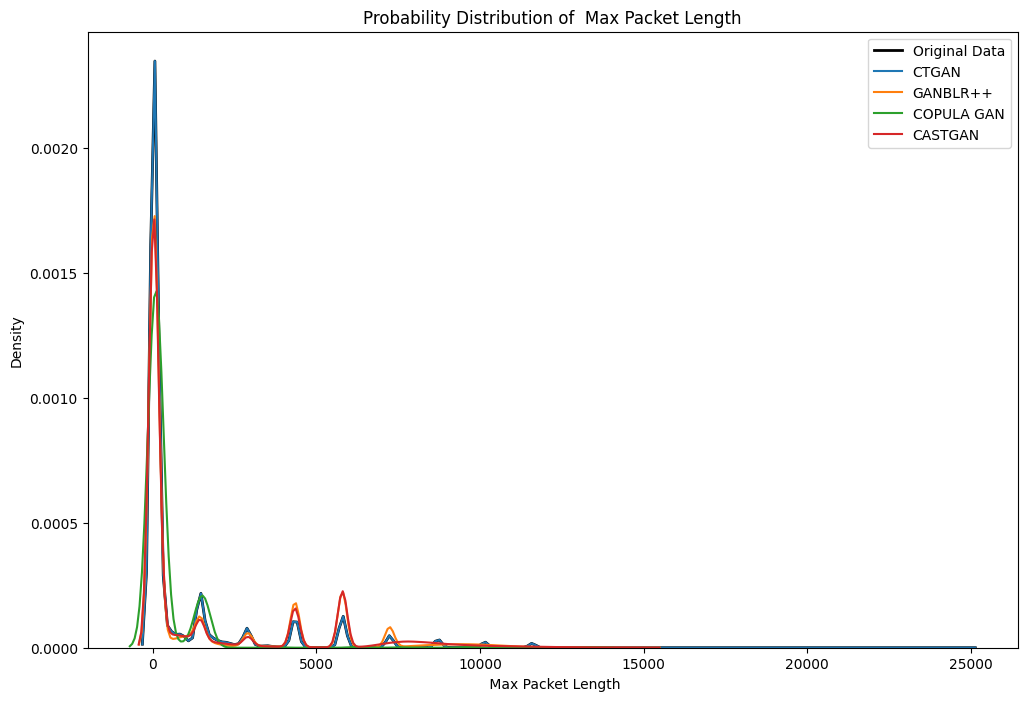

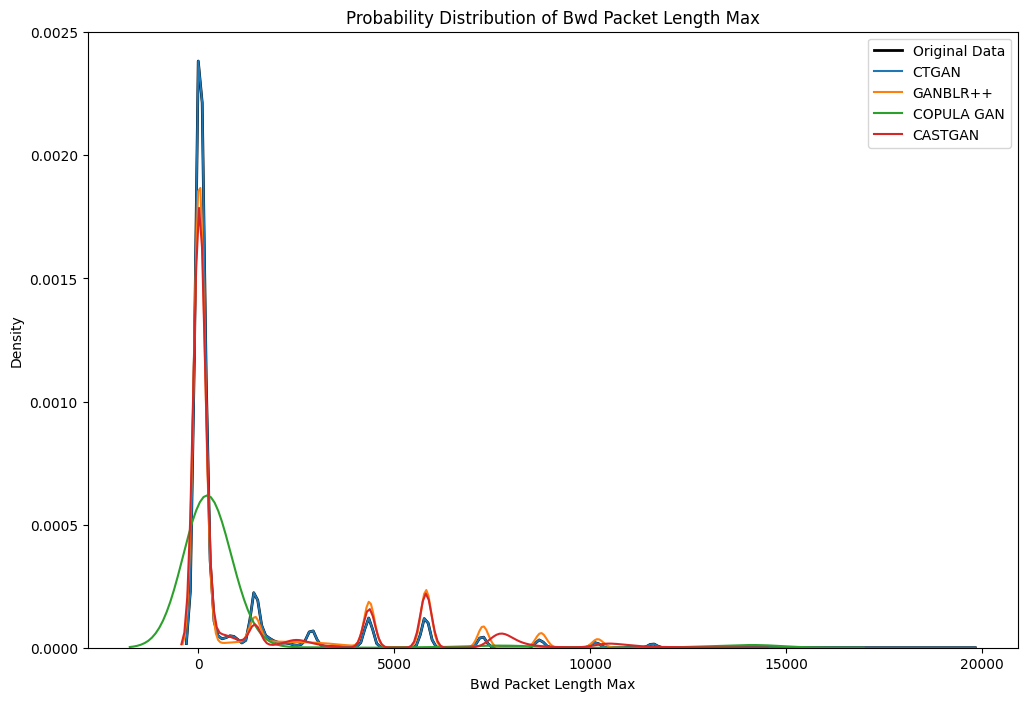

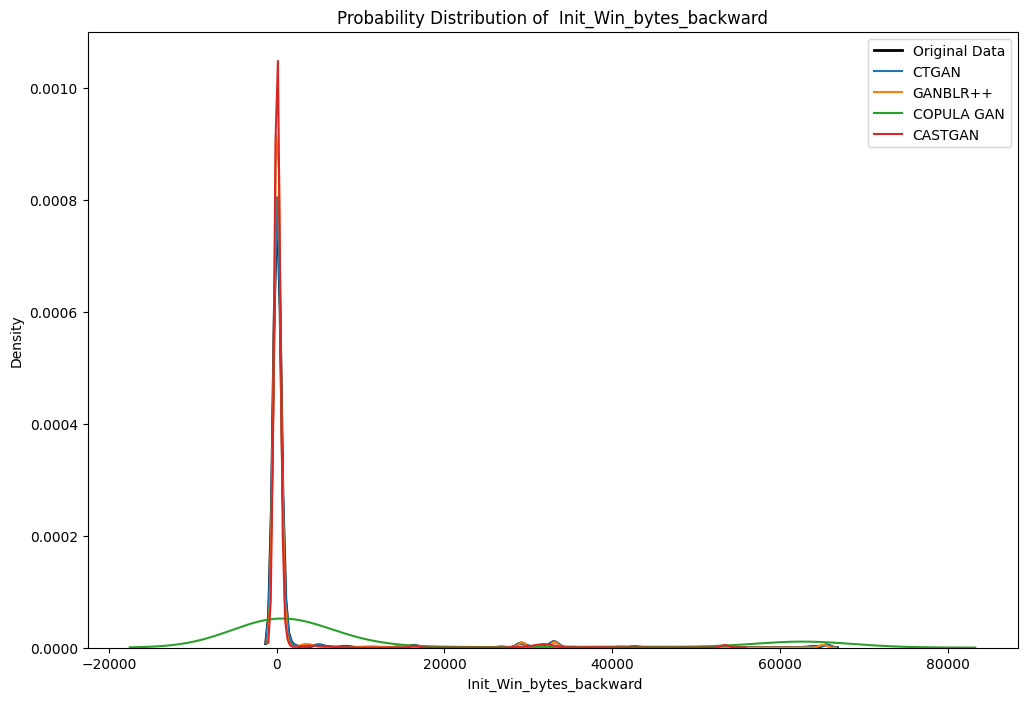

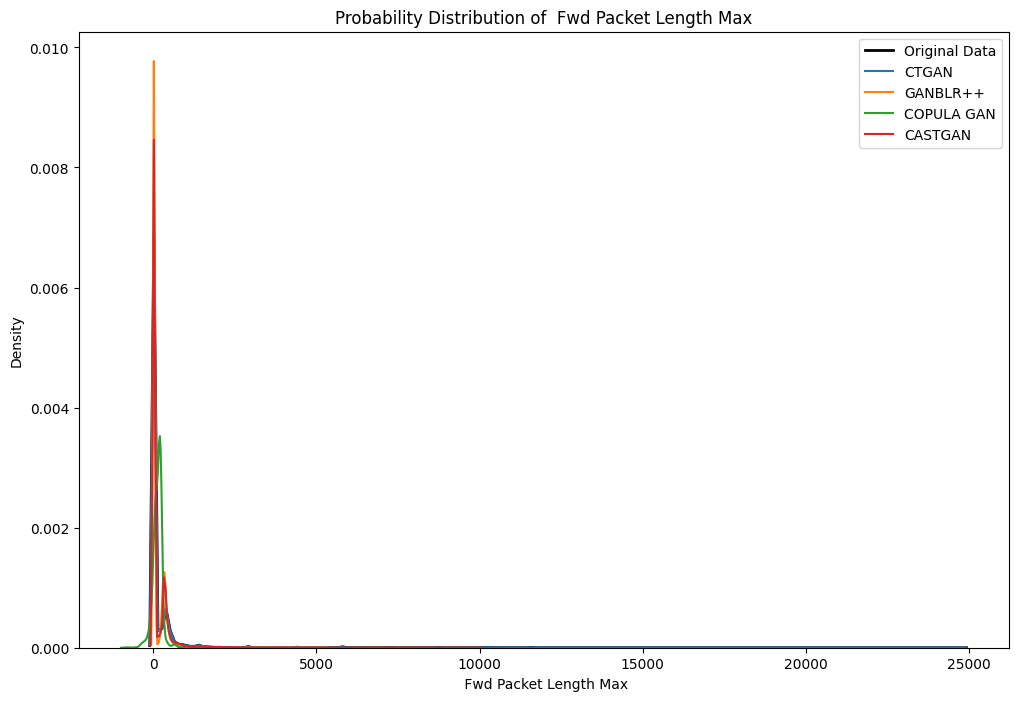

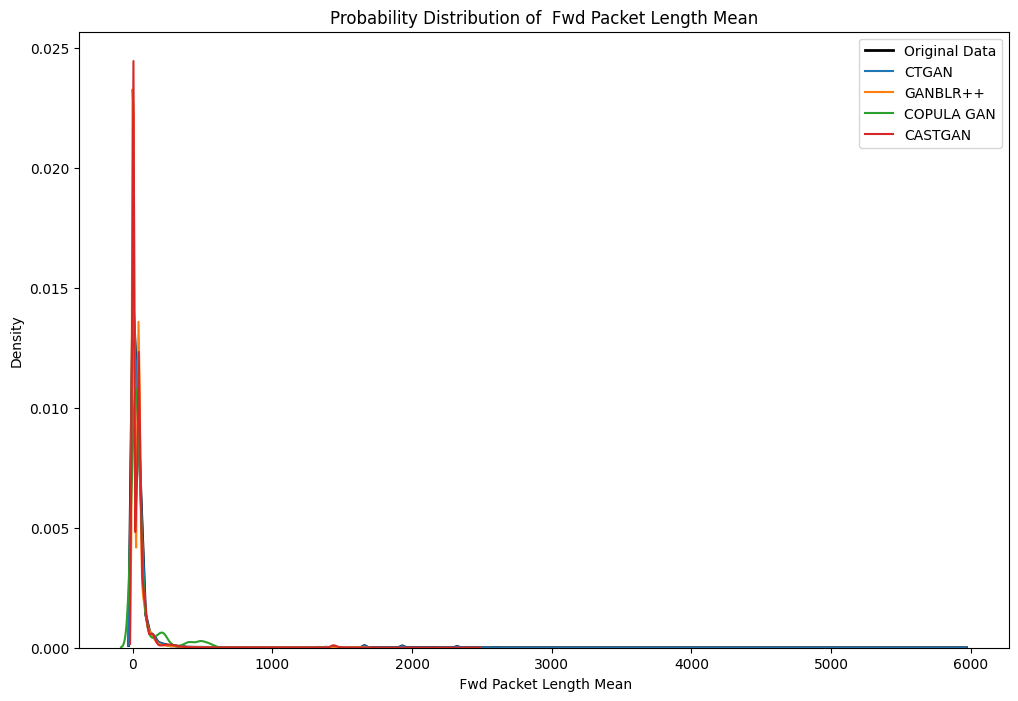

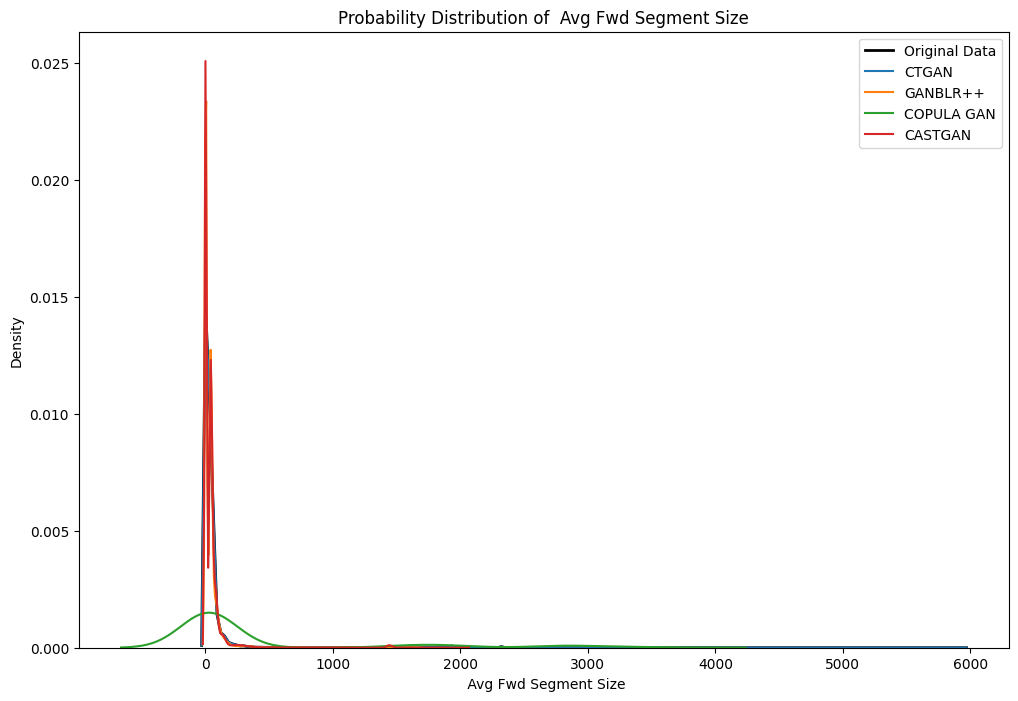

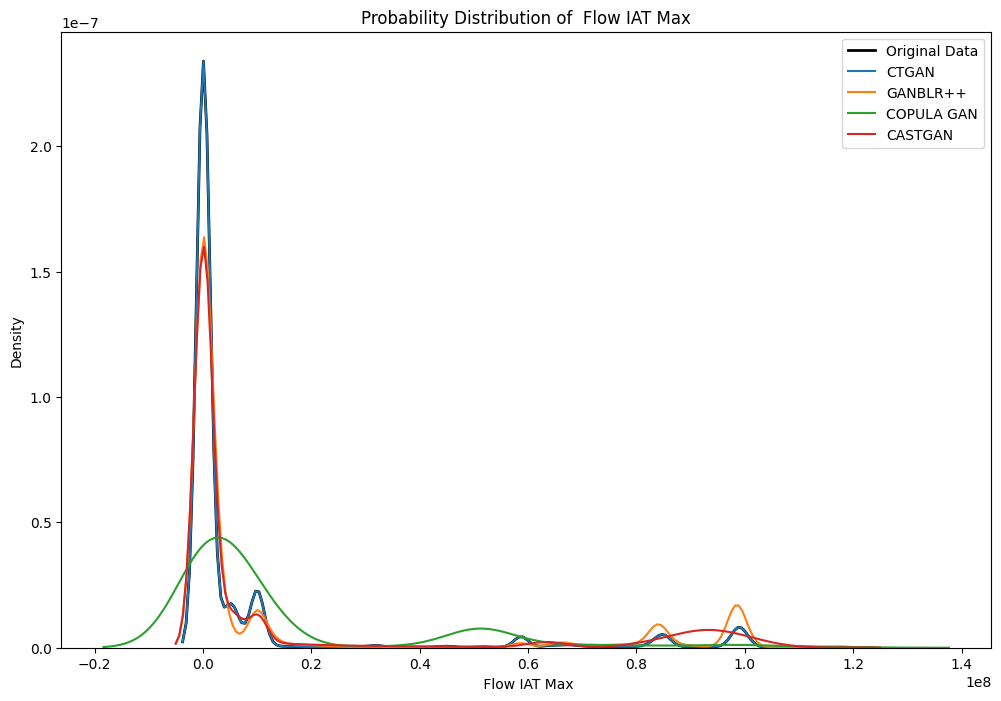

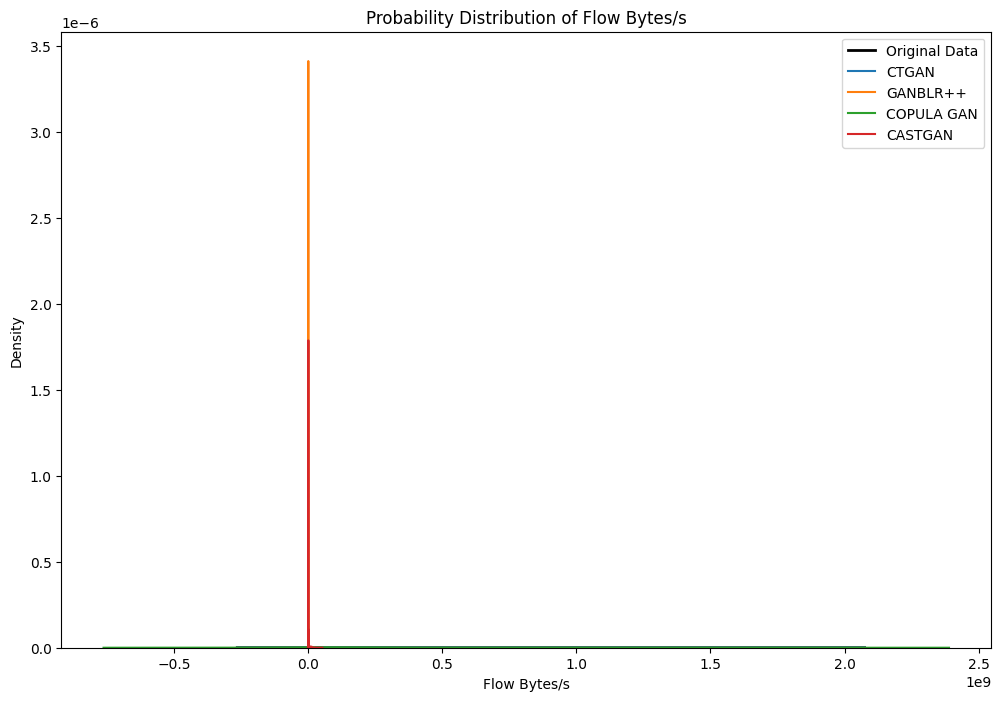

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# List of DataFrames and their titles
dfs = [df, data_ctgan, data_ganblrpp, data_copula_gan, data_castgan]
titles = ["Original Data", "CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]

# Function to compare distributions and calculate KS test results
def compare_distributions(real_data, synthetic_datasets, titles):
    results = {}
    average_results = {}
    
    for synthetic_data, title in zip(synthetic_datasets, titles):
        
        ks_results = []
        
        equal_count = 0
        different_count = 0
        
        for column in real_data.columns:
            if column == 'target':
                continue
            
            if column not in synthetic_data.columns:
                print(f"Column {column} not found in dataset {title}. Skipping.")
                continue
            
            real_values = real_data[column].values
            synthetic_values = synthetic_data[column].values
            
            # Perform KS Test
            ks_statistic, ks_p_value = ks_2samp(real_values, synthetic_values)
            
            # Store KS test results
            ks_results.append({
                'Feature': column,
                'KS Statistic': ks_statistic,
                'KS P-value': ks_p_value
            })
            
            # Count equal and different distributions
            if ks_p_value > 0.05:
                equal_count += 1
            else:
                different_count += 1
        
        # Store results for current synthetic dataset
        results[title] = ks_results
        
        # Calculate average results
        total_features = len(real_data.columns) - 1  # excluding target column
        average_results[title] = {
            'Equal Distributions': equal_count,
            'Different Distributions': different_count,
            'Average KS P-value': np.mean([result['KS P-value'] for result in ks_results])
        }
    
    # Print average results
    print("\n--- Average Results ---")
    for title, avg_res in average_results.items():
        print(f"{title}:")
        print(f"Equal Distributions: {avg_res['Equal Distributions']}")
        print(f"Different Distributions: {avg_res['Different Distributions']}")
        print(f"Average KS P-value: {avg_res['Average KS P-value']}")
        print("-----------------------------")
    
    return results, average_results

# Function to plot KDE plots for all features across all datasets
def plot_kde_comparison(real_data, synthetic_datasets, titles):
    num_datasets = len(synthetic_datasets)  # excluding original data
    num_features = len(real_data.columns) - 1  # excluding target column
    
    for column in real_data.columns:
        if column == 'target':
            continue
        
        plt.figure(figsize=(12, 8))
        
        # Plot the original data curve
        sns.kdeplot(real_data[column], label='Original Data', linewidth=2, color='black')
        
        # Plot KDE for each synthetic dataset
        for i, (synthetic_data, title) in enumerate(zip(synthetic_datasets, titles[1:])):  # Skip the original in titles
            if column in synthetic_data.columns:
                sns.kdeplot(synthetic_data[column], label=title)
        
        plt.title(f'Probability Distribution of {column}')
        plt.legend()
        plt.show()

# Example usage
results, average_results = compare_distributions(df, dfs, titles)
plot_kde_comparison(df, dfs, titles)



--- Average Results ---
Original Data:
Equal Distributions: 20
Different Distributions: 0
Average KS P-value: 1.0
-----------------------------
CTGAN:
Equal Distributions: 0
Different Distributions: 20
Average KS P-value: 0.0
-----------------------------
GANBLR++:
Equal Distributions: 0
Different Distributions: 20
Average KS P-value: 4.0563186070385707e-56
-----------------------------
COPULA GAN:
Equal Distributions: 0
Different Distributions: 20
Average KS P-value: 0.0
-----------------------------
CASTGAN:
Equal Distributions: 0
Different Distributions: 20
Average KS P-value: 0.0
-----------------------------


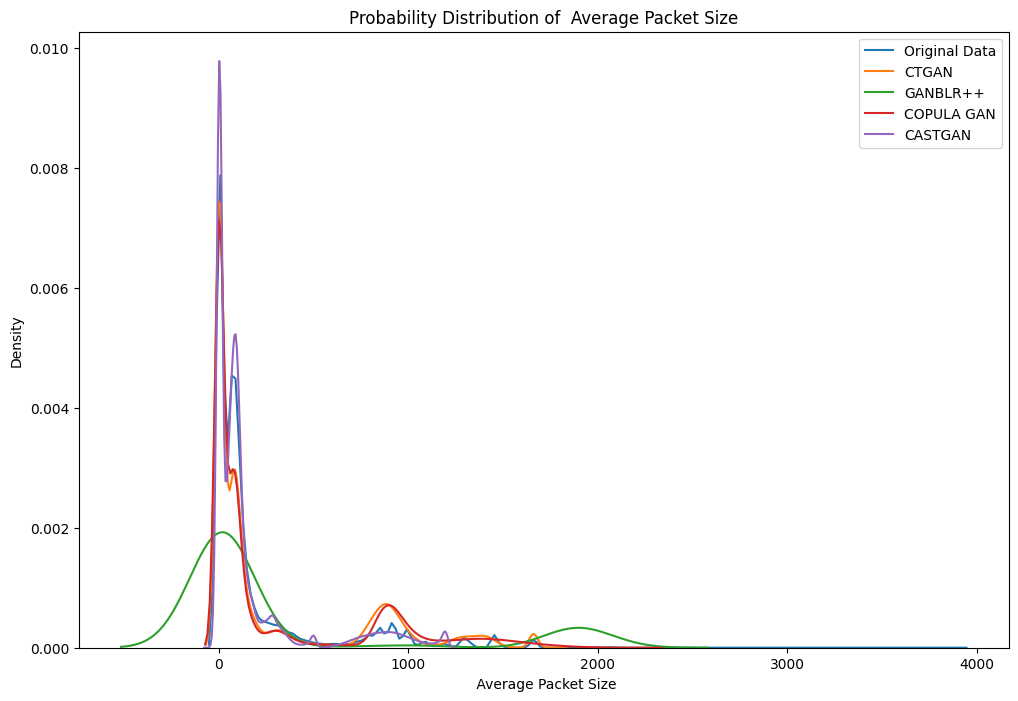

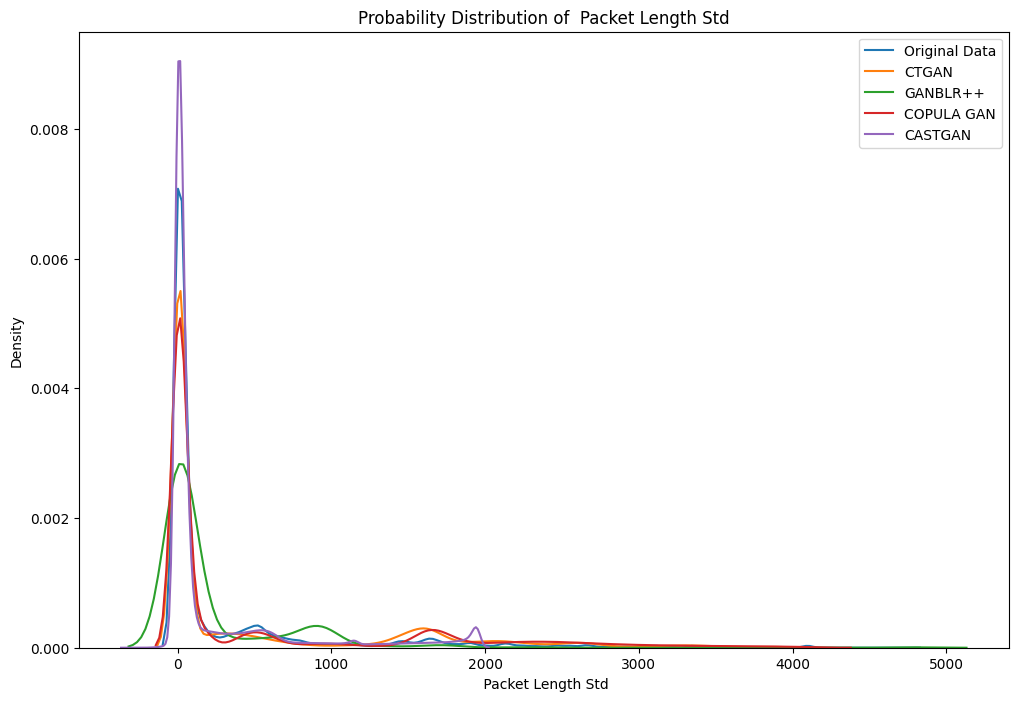

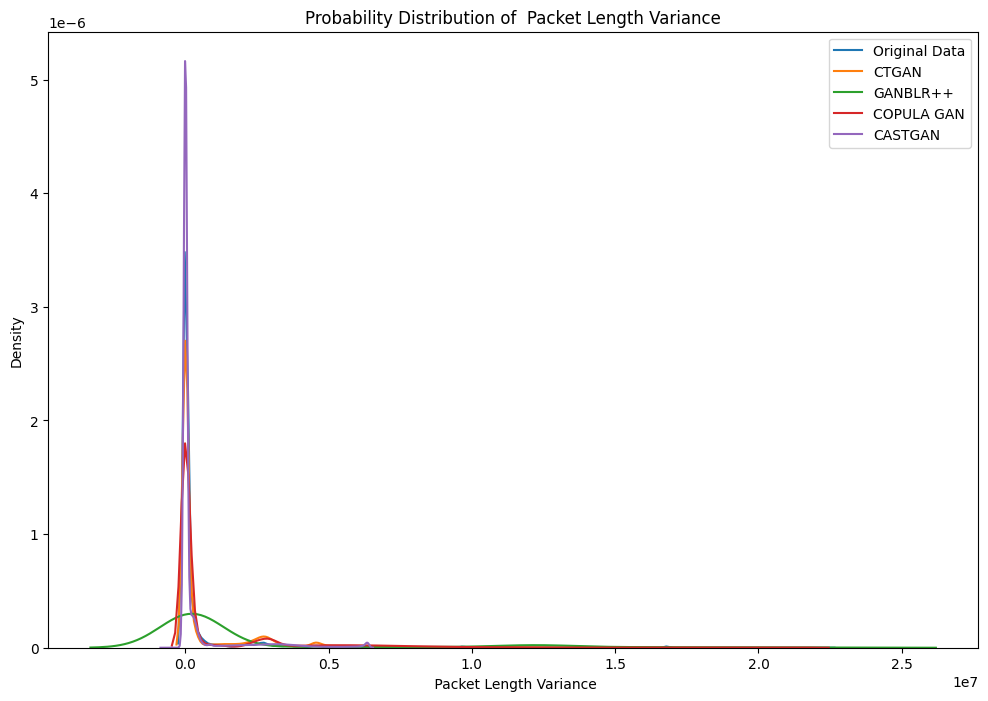

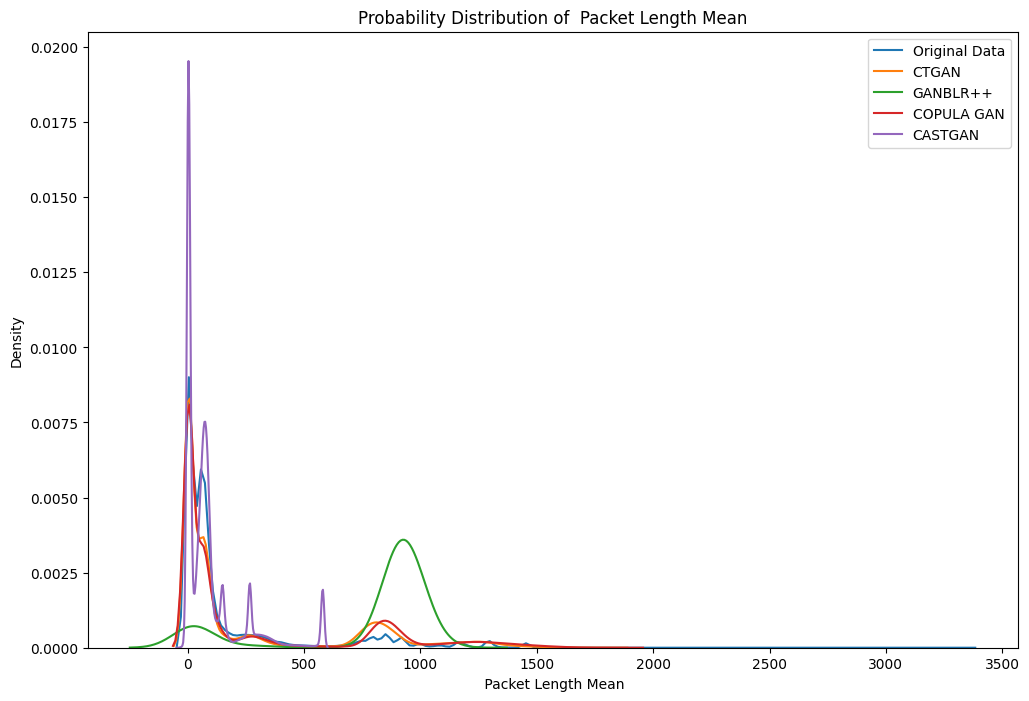

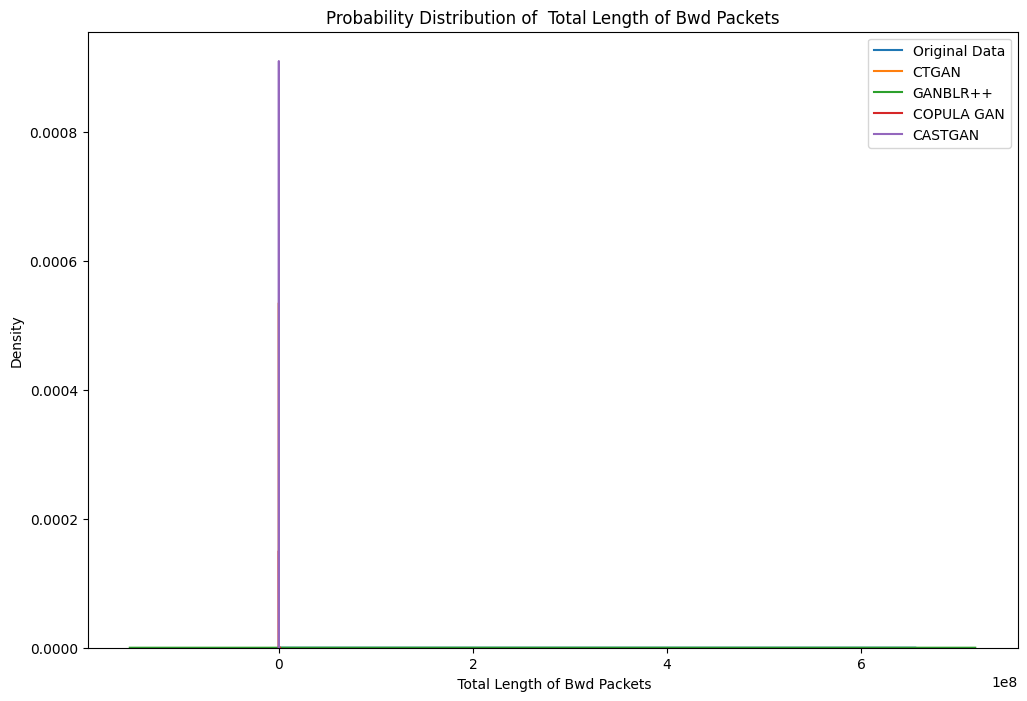

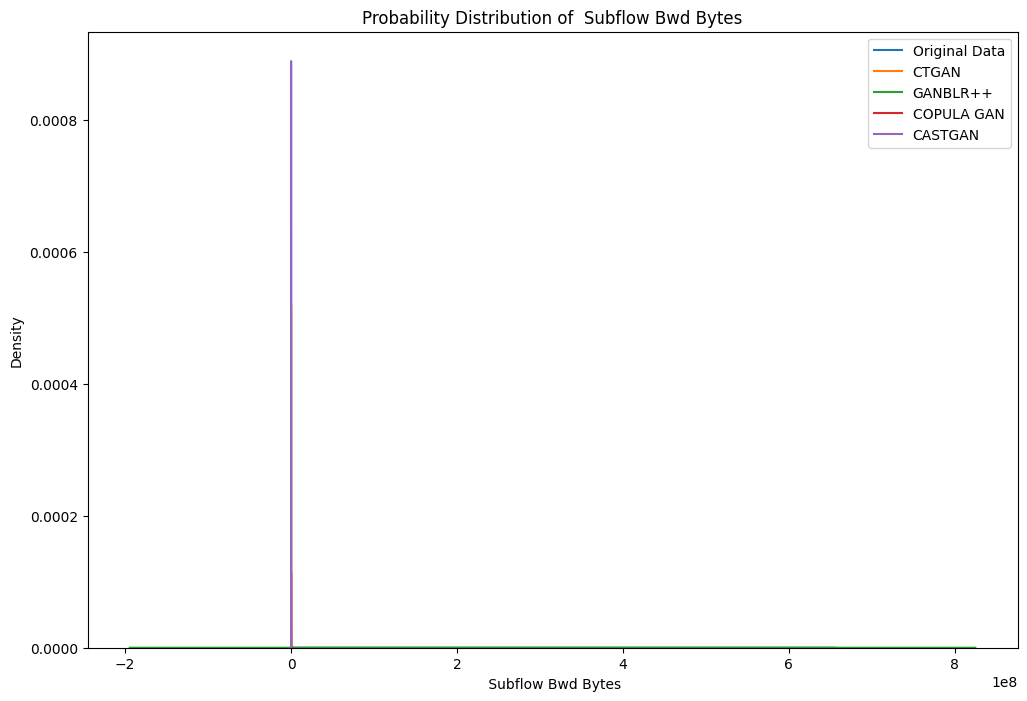

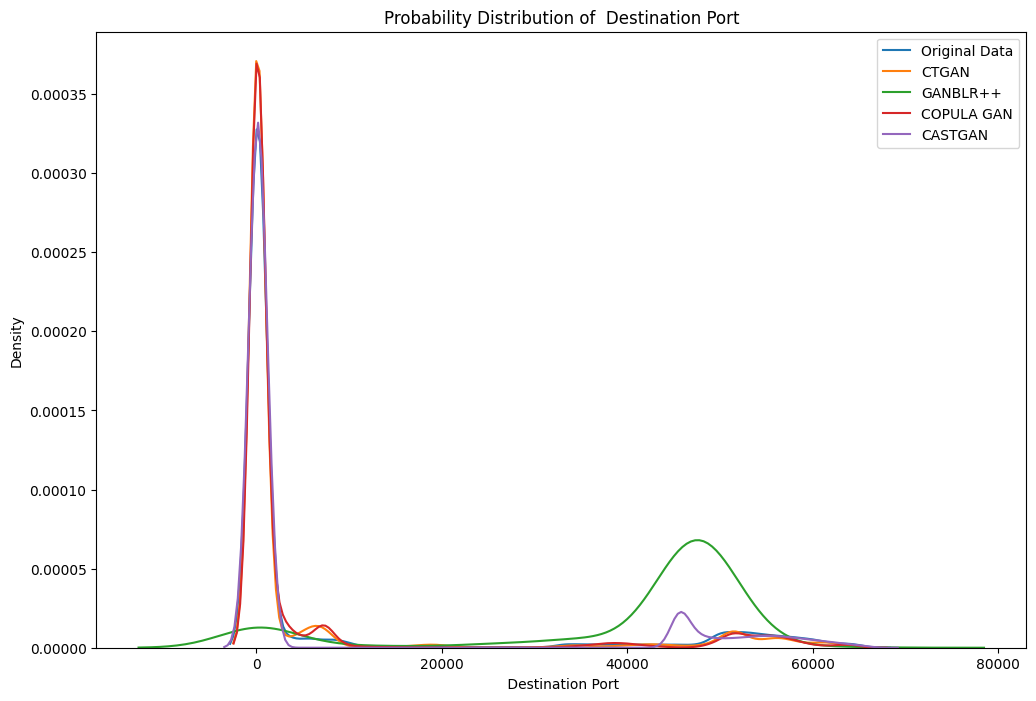

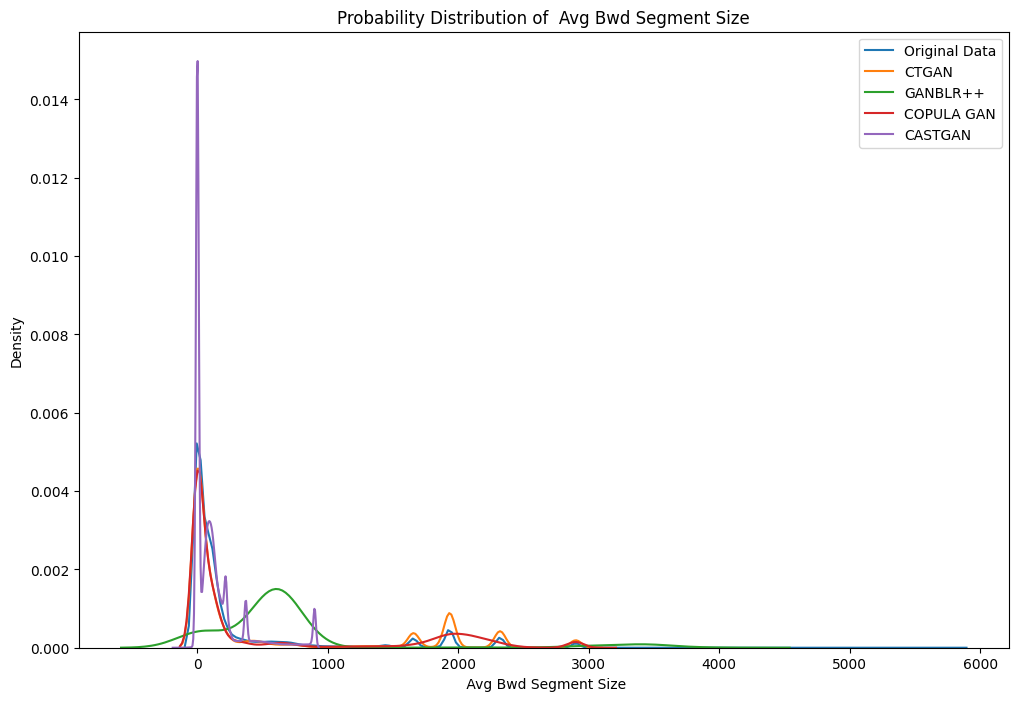

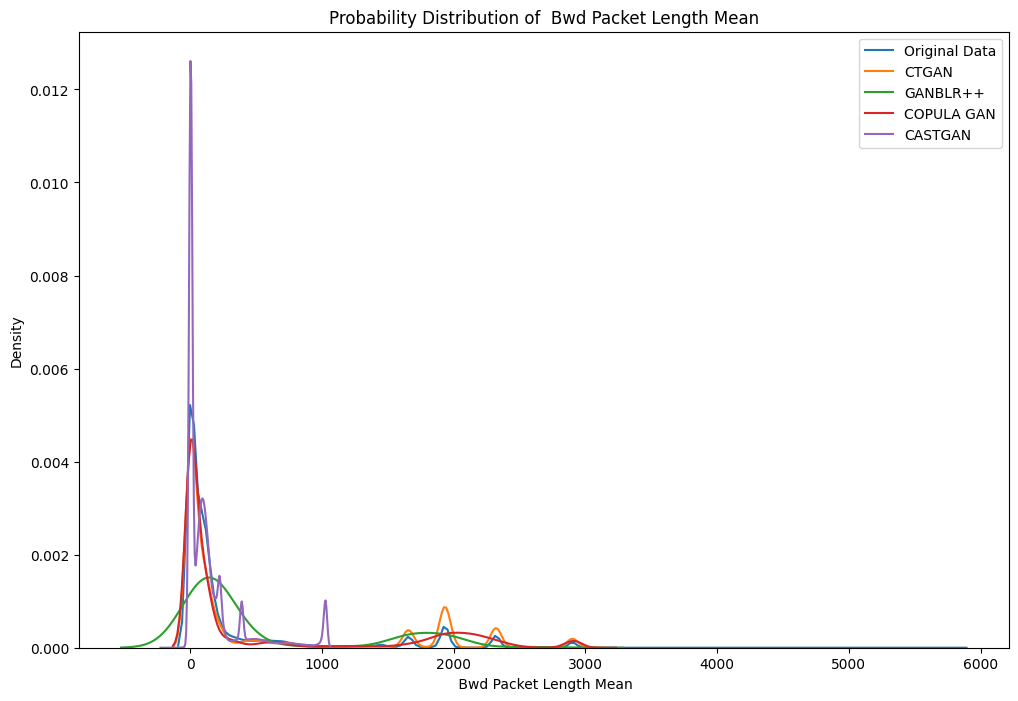

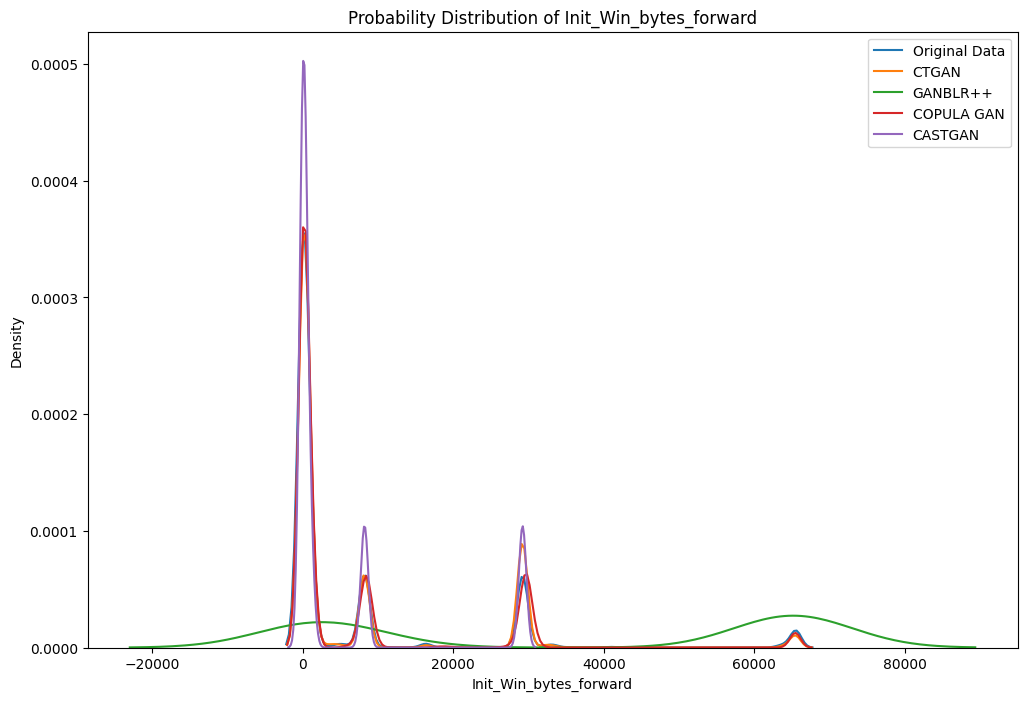

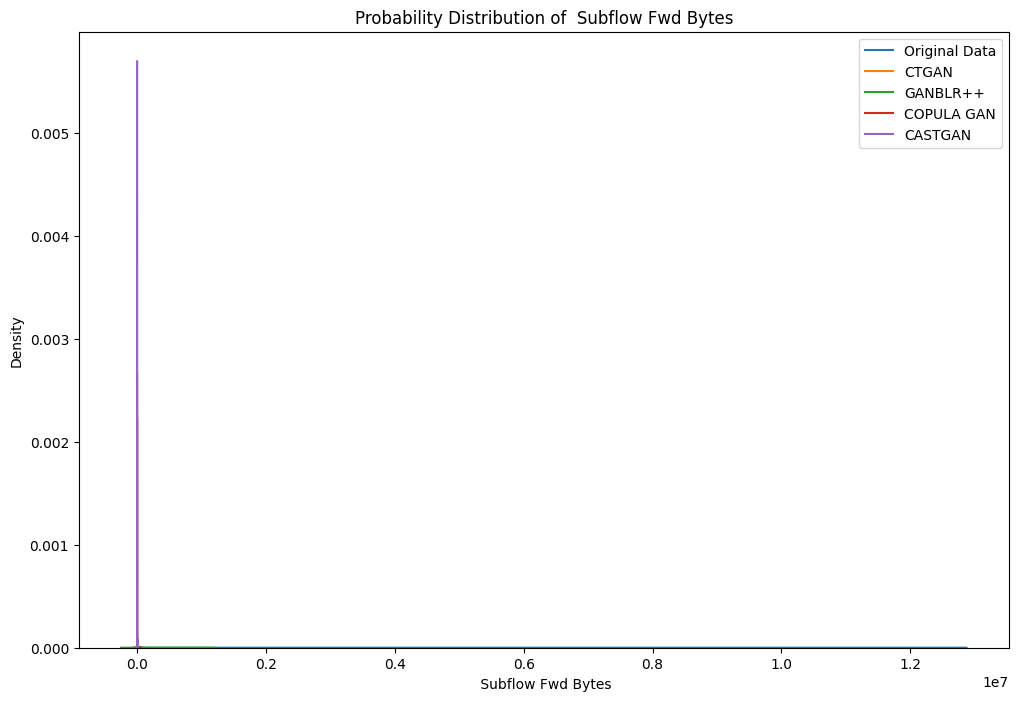

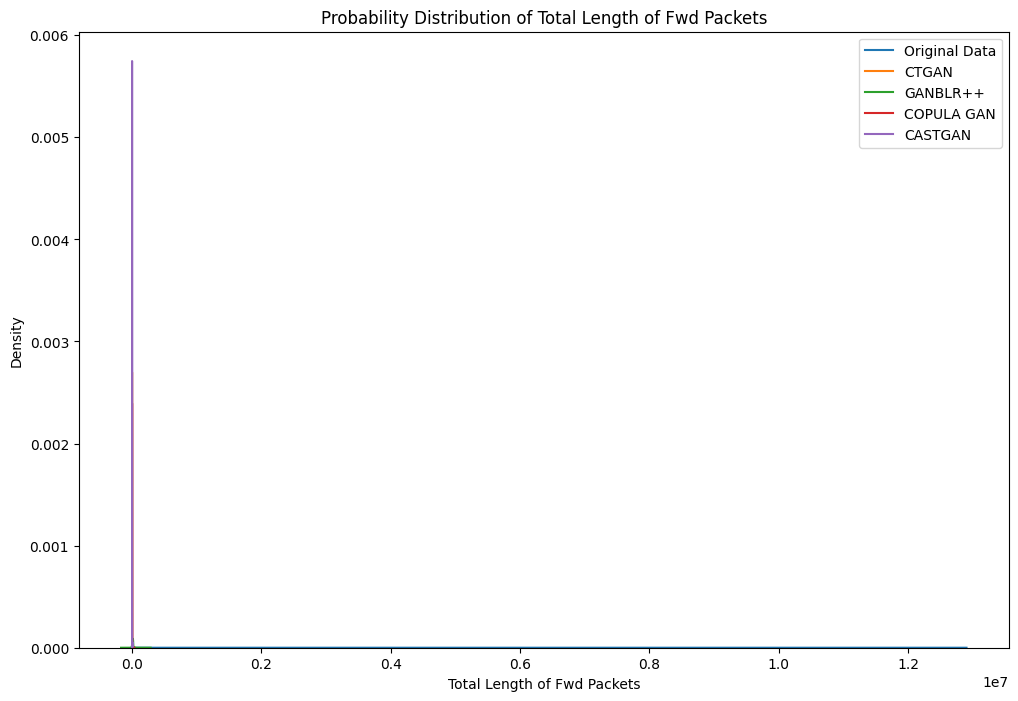

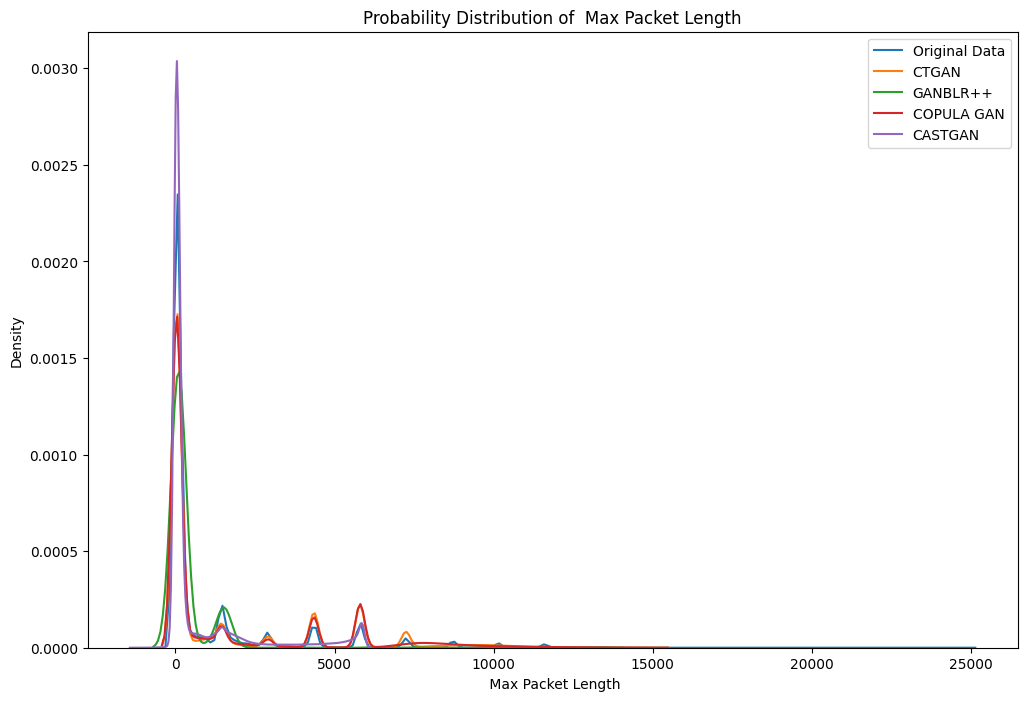

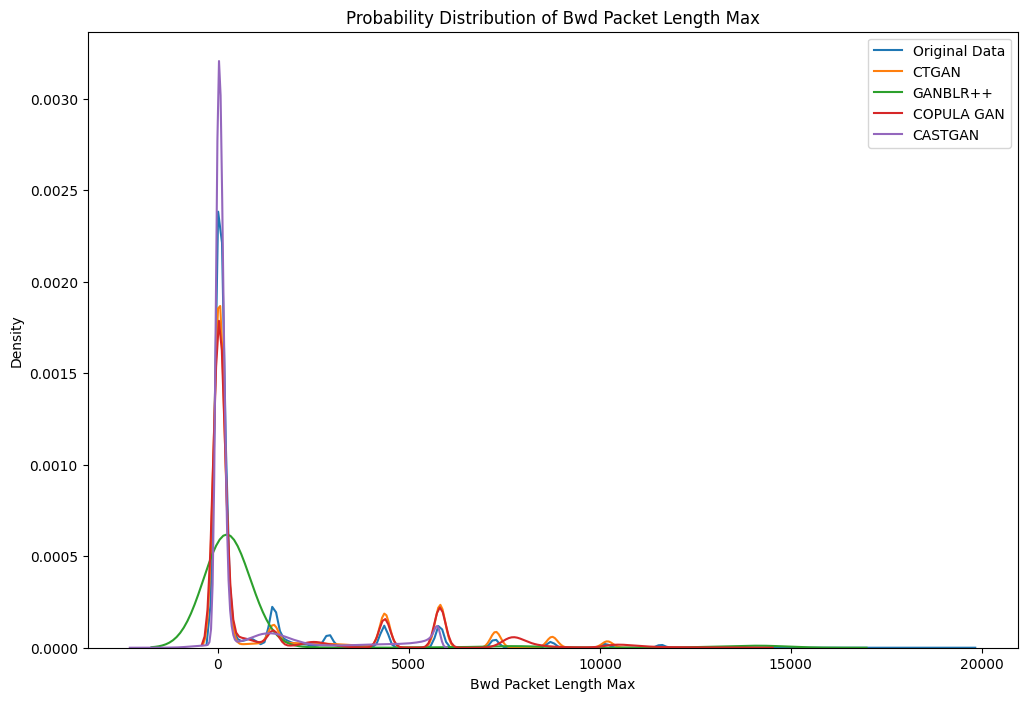

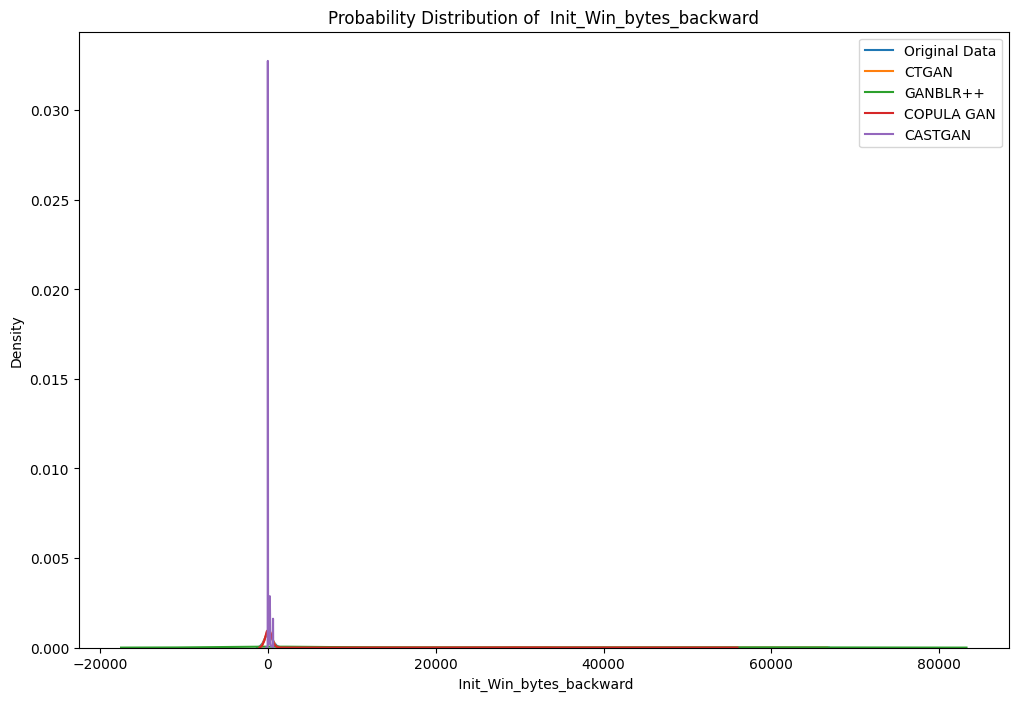

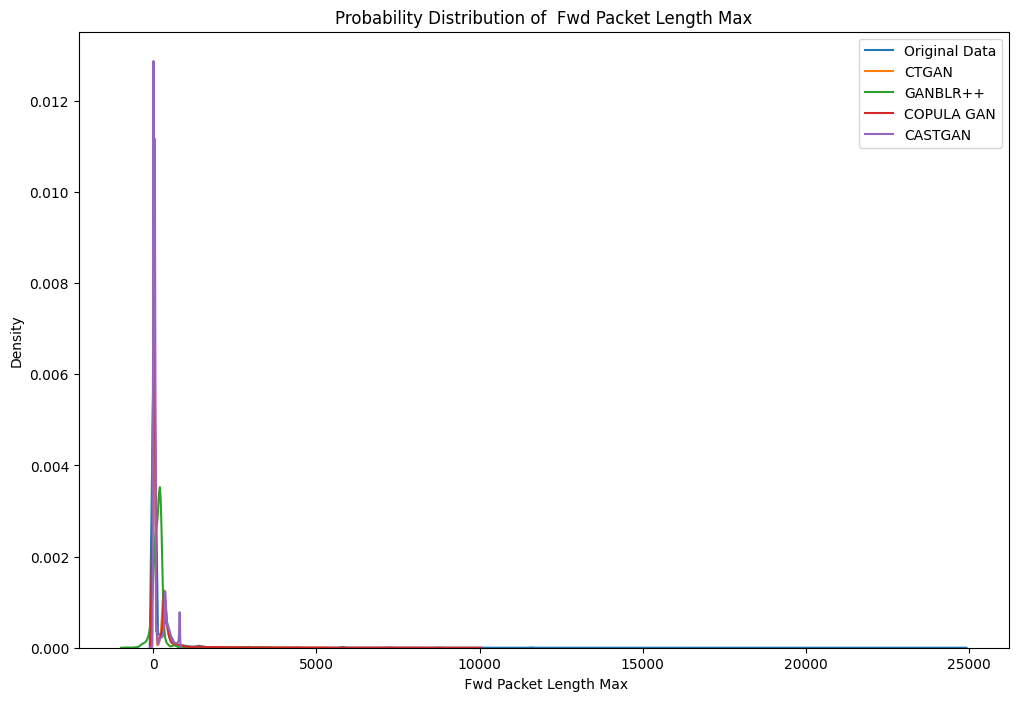

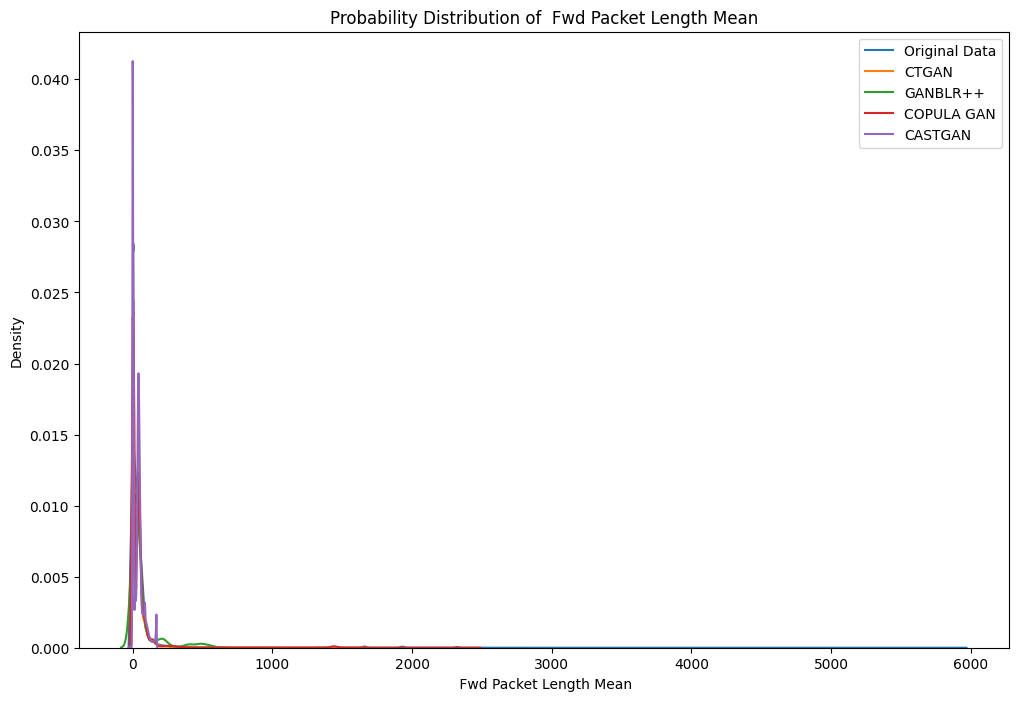

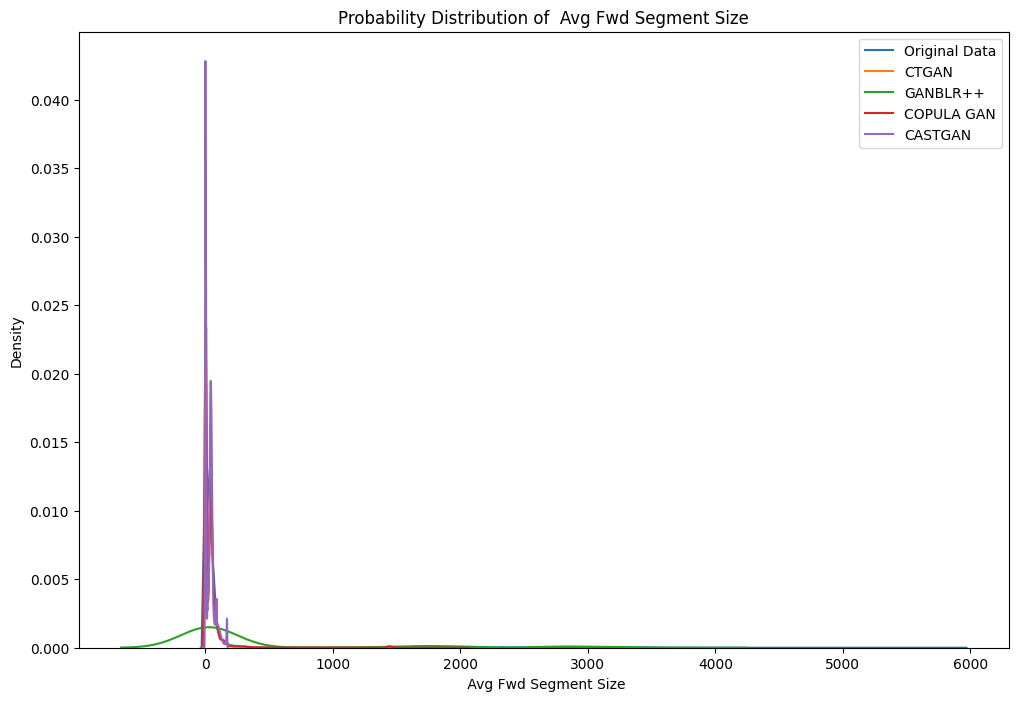

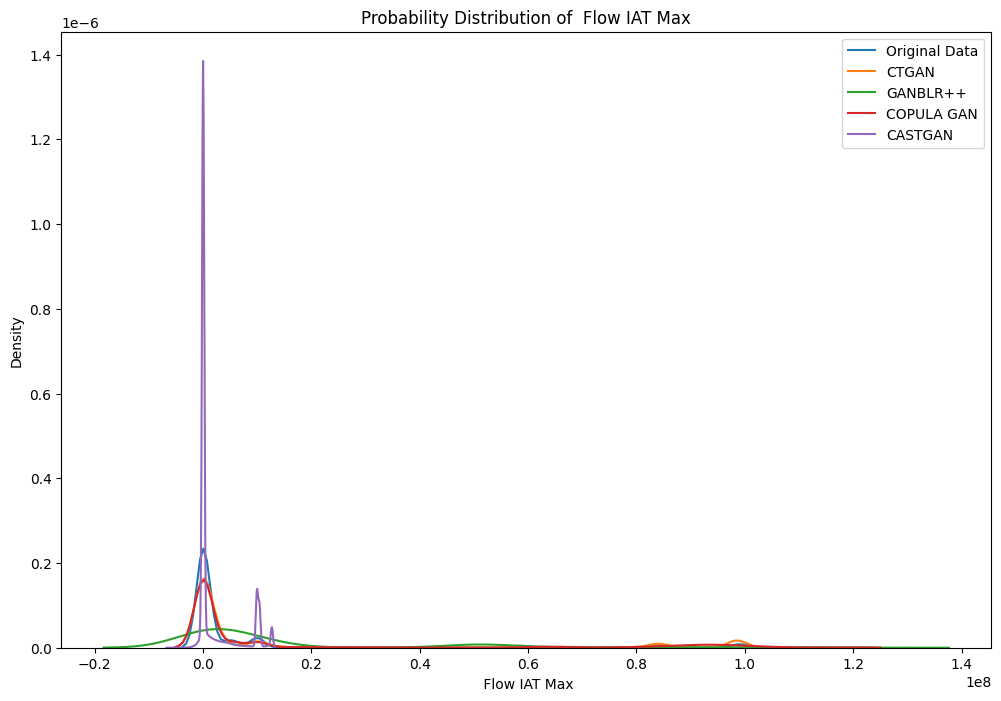

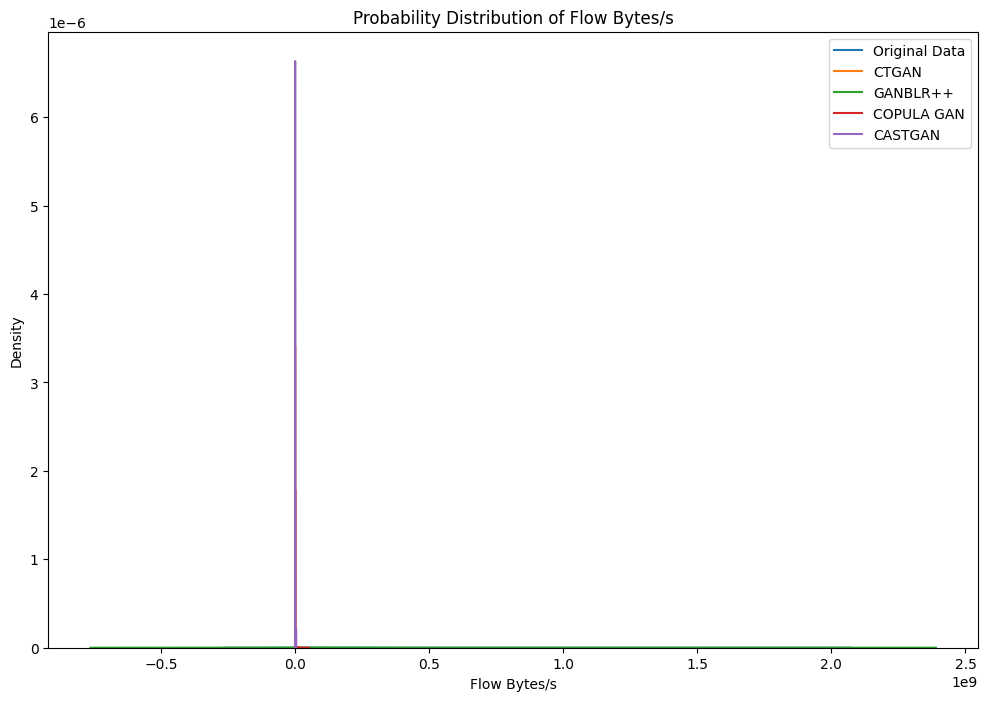

In [18]:

# List of DataFrames
dfs = [df, data_ctgan, data_ganblrpp, data_copula_gan, data_castgan]
titles = ["Original Data", "CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]

# Function to compare distributions and calculate KS test results
def compare_distributions(real_data, synthetic_datasets, titles):
    results = {}
    average_results = {}
    
    for synthetic_data, title in zip(synthetic_datasets, titles):
        
        ks_results = []
        
        equal_count = 0
        different_count = 0
        
        for column in real_data.columns:
            if column == 'target':
                continue
            
            real_values = real_data[column].values
            synthetic_values = synthetic_data[column].values
            
            # Perform KS Test
            ks_statistic, ks_p_value = ks_2samp(real_values, synthetic_values)
            
            # Store KS test results
            ks_results.append({
                'Feature': column,
                'KS Statistic': ks_statistic,
                'KS P-value': ks_p_value
            })
            
            # Count equal and different distributions
            if ks_p_value > 0.05:
                equal_count += 1
            else:
                different_count += 1
        
        # Store results for current synthetic dataset
        results[title] = ks_results
        
        # Calculate average results
        total_features = len(real_data.columns) - 1  # excluding target column
        average_results[title] = {
            'Equal Distributions': equal_count,
            'Different Distributions': different_count,
            'Average KS P-value': np.mean([result['KS P-value'] for result in ks_results])
        }
    
    # Print average results
    print("\n--- Average Results ---")
    for title, avg_res in average_results.items():
        print(f"{title}:")
        print(f"Equal Distributions: {avg_res['Equal Distributions']}")
        print(f"Different Distributions: {avg_res['Different Distributions']}")
        print(f"Average KS P-value: {avg_res['Average KS P-value']}")
        print("-----------------------------")
    
    return results, average_results

# Function to plot KDE plots for all features across all datasets
def plot_kde_comparison(real_data, synthetic_datasets, titles, ks_results):
    num_datasets = len(synthetic_datasets) + 1  # including original data
    num_features = len(real_data.columns) - 1  # excluding target column
    
    for column in real_data.columns:
        if column == 'target':
            continue
        
        plt.figure(figsize=(12, 8))
        for i, synthetic_data in enumerate(synthetic_datasets):
            sns.kdeplot(synthetic_data[column], label=titles[i])
        
        #sns.kdeplot(real_data[column], label='Original Data', linewidth=3, color='black')
        
        # Annotate KS test results on the plot
        #for result in ks_results:
         #   ks_statistic = result['KS Statistic']
          #  ks_p_value = result['KS P-value']
           # if ks_p_value > 0.05:
            #    plt.text(0.98, 0.95 - ks_results.index(result)*0.05, f'{result["Feature"]}: KS p-value={ks_p_value:.3f}', transform=plt.gca().transAxes, ha='right', color='green')
            #else:
             #   plt.text(0.98, 0.95 - ks_results.index(result)*0.05, f'{result["Feature"]}: KS p-value={ks_p_value:.3f}', transform=plt.gca().transAxes, ha='right', color='red')
        
        plt.title(f'Probability Distribution of {column}')
        plt.legend()
        plt.show()

# Example usage
# Assuming `dfs`, `titles`, and `df` are defined as before
results, average_results = compare_distributions(df, dfs, titles)
plot_kde_comparison(df, dfs, titles, results[titles[1]])  # Display for one synthetic dataset (change index as needed)


## ML Utility

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, f1

# Initialize results dictionary
utility_results = {title: {'TRTR_accuracy': 0, 'TRTR_f1': 0, 'TSTR_accuracy': 0, 'TSTR_f1': 0} for title in titles[1:]}

# Evaluate TRTR (Training on Real, Testing on Real)
model_trtr = RandomForestClassifier(random_state=42)
model_trtr.fit(X_train, y_train)
trtr_accuracy, trtr_f1 = evaluate_model(model_trtr, X_test, y_test)
utility_results["Original Data"] = {'TRTR_accuracy': trtr_accuracy, 'TRTR_f1': trtr_f1}

# Evaluate TSTR (Training on Synthetic, Testing on Real) data
for i, df in enumerate(dfs[1:], 1):
    X_synthetic = df.drop('target', axis=1)
    y_synthetic = df['target']
    model_tstr = RandomForestClassifier(random_state=42)
    model_tstr.fit(X_synthetic, y_synthetic)
    tstr_accuracy, tstr_f1 = evaluate_model(model_tstr, X_test, y_test)
    utility_results[titles[i]]['TSTR_accuracy'] = tstr_accuracy
    utility_results[titles[i]]['TSTR_f1'] = tstr_f1

# Display the utility results
utility_df = pd.DataFrame(utility_results).T
print("Utility results (F1 score, accuracy comparison of TRTR and TSTR) for all datasets:")
print(utility_df)


Utility results (F1 score, accuracy comparison of TRTR and TSTR) for all datasets:
               TRTR_accuracy   TRTR_f1  TSTR_accuracy   TSTR_f1
CTGAN               0.000000  0.000000       0.953457  0.954923
GANBLR++            0.000000  0.000000       0.536722  0.583539
COPULA GAN          0.000000  0.000000       0.975626  0.975931
CASTGAN             0.000000  0.000000       0.973616  0.973955
Original Data       0.997838  0.997838            NaN       NaN


In [21]:
for title, df in zip(titles, dfs):
    print(f"DataFrame: {title}")
    #print(df.logged_in.value_counts())
    #print(df.protocol_type_icmp.value_counts())
    #print(df.protocol_type_tcp.value_counts())
    #print(df.service_http.value_counts())
    #print(df.flag_S0.value_counts())
    #print(df.flag_SF.value_counts())
    print(df.target.value_counts())
    print("\n")  # Add a newline for better readability between DataFrames


DataFrame: Original Data
target
0    2271320
1     556556
Name: count, dtype: int64


DataFrame: CTGAN
target
0    1485960
1    1341916
Name: count, dtype: int64


DataFrame: GANBLR++
target
0    822
1    178
Name: count, dtype: int64


DataFrame: COPULA GAN
target
0    1485961
1    1341915
Name: count, dtype: int64


DataFrame: CASTGAN
target
0    2238694
1     589182
Name: count, dtype: int64




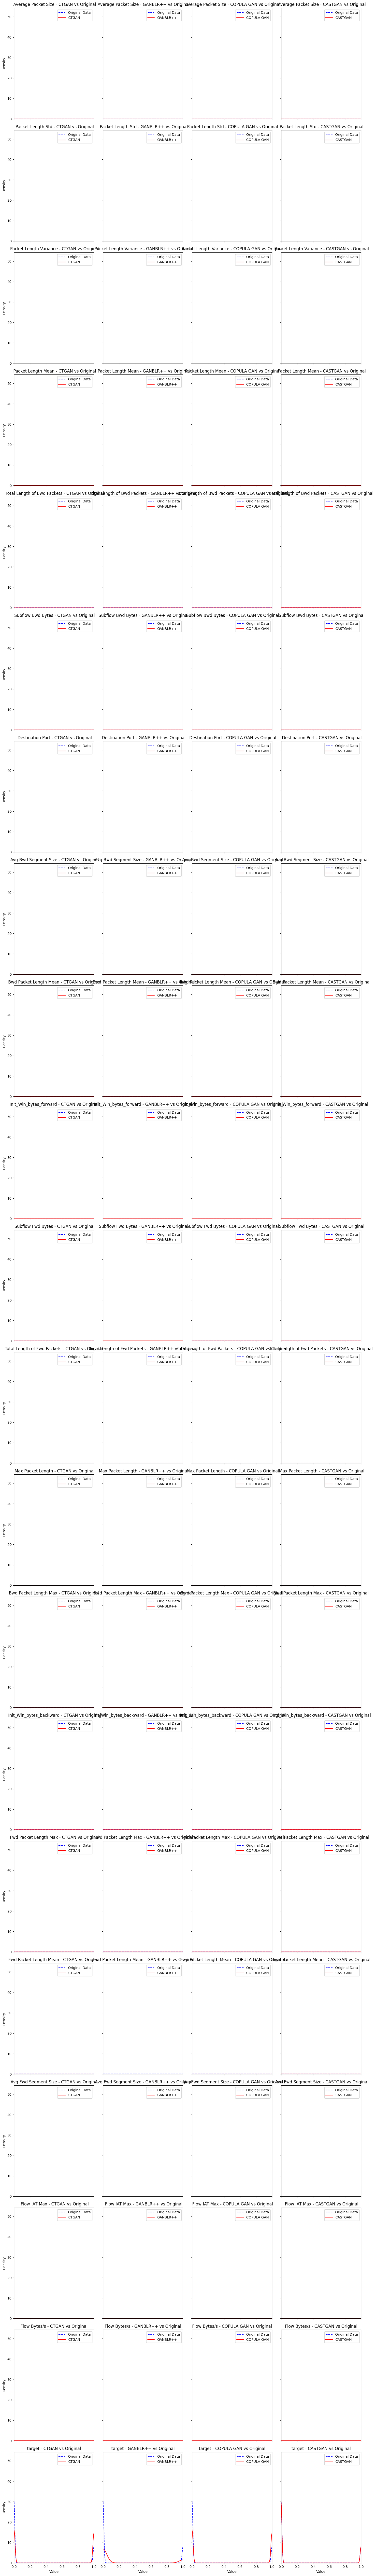

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of DataFrames
dfs = [df, data_ctgan, data_ganblrpp, data_copula_gan, data_castgan]
titles = ["Original Data", "CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]

# Ensure that all DataFrames have the same columns
features = df.columns  # List of feature names

# Number of features
num_features = len(features)
num_datasets = len(dfs) - 1  # Number of synthetic datasets

# Create a figure with subplots
fig, axes = plt.subplots(num_features, num_datasets, figsize=(15, 5 * num_features), sharex=True, sharey=True)

# Iterate over each feature
for i, feature in enumerate(features):
    # Data ranges for consistent scaling
    all_data = pd.concat([df[feature]] + [dataset[feature] for dataset in dfs[1:]], axis=0)
    data_min, data_max = all_data.min(), all_data.max()
    
    for j in range(1, len(dfs)):
        # Plot original data KDE
        sns.kdeplot(df[feature], ax=axes[i, j-1], color='blue', label='Original Data', linestyle='--', bw_adjust=0.5)
        
        # Plot synthetic dataset KDE
        sns.kdeplot(dfs[j][feature], ax=axes[i, j-1], color='red', label=titles[j], bw_adjust=0.5)
        
        # Set title and legend
        axes[i, j-1].set_title(f'{feature} - {titles[j]} vs Original')
        axes[i, j-1].legend()
        
        # Set limits based on all data ranges
        axes[i, j-1].set_xlim(data_min, data_max)
        axes[i, j-1].set_ylim(0, axes[i, j-1].get_ylim()[1] * 1.1)

# Set labels for x and y axes
for ax in axes.flat:
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


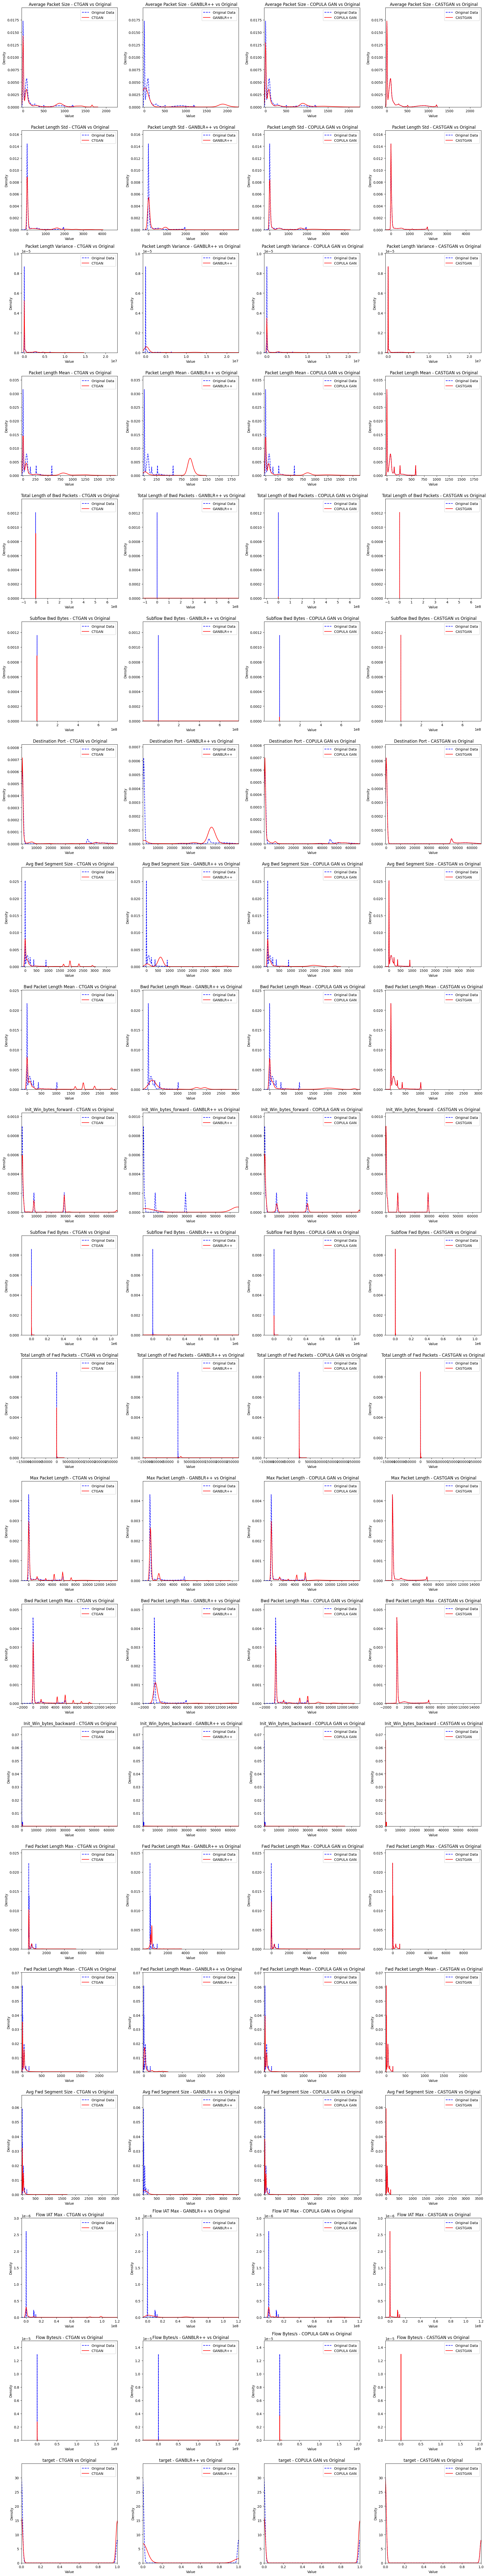

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


dfs = [data_ctgan, data_ganblrpp, data_copula_gan, data_castgan]  # Synthetic DataFrames
titles = ["CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]  # Titles for the synthetic datasets

# Ensure that all DataFrames have the same columns
features = df.columns  # List of feature names

# Create a figure with subplots
fig, axes = plt.subplots(len(features), len(dfs), figsize=(20, 5 * len(features)), sharex=False, sharey=False)

for i, feature in enumerate(features):
    # Data ranges for individual scaling
    all_data = pd.concat([df[feature]] + [dataset[feature] for dataset in dfs], axis=0)
    data_min, data_max = all_data.min(), all_data.max()

    # Plot KDE for each synthetic dataset
    for j, (synthetic_data, title) in enumerate(zip(dfs, titles)):
        if feature in synthetic_data.columns:
            # Plot original data KDE
            sns.kdeplot(df[feature], ax=axes[i, j], color='blue', label='Original Data', linestyle='--', bw_adjust=0.5)
            
            # Plot synthetic dataset KDE
            sns.kdeplot(synthetic_data[feature], ax=axes[i, j], color='red', label=title, bw_adjust=0.5)
            
            # Set title and legend
            axes[i, j].set_title(f'{feature} - {title} vs Original')
            axes[i, j].legend()
            
            # Set limits based on individual feature data
            axes[i, j].set_xlim(data_min, data_max)
            axes[i, j].set_ylim(0, axes[i, j].get_ylim()[1] * 1.1)
        else:
            # Handle missing feature in synthetic datasets
            axes[i, j].text(0.5, 0.5, 'No Data', ha='center', va='center', fontsize=12)
            axes[i, j].set_title(f'{feature} - {title} vs Original')
            axes[i, j].set_xlim(data_min, data_max)
            axes[i, j].set_ylim(0, 1)

# Set labels for x and y axes
for ax in axes.flat:
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()
